# Project : Baseball Case Study

Problem Statement : 
    
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

# Imported the requried libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


I have loaded the base ball dataset directly from the github

In [10]:
df.shape

(30, 17)

There are total 30 rows and 17 columns which means that the dataset is very small so I have to consider all the features in the latter stages.

In [11]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Column Summary 

I will rename the column names so it will be easier for me to do the preprocessing part and correctly visualize our data properly.

In [12]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


I have renamed the column names with the data provided in the above wikipedia link.

In [13]:
#Information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In [14]:
df.dtypes

Wins                    int64
Runs Scored             int64
At Bat                  int64
Hits                    int64
Doubles                 int64
Triples                 int64
Home Runs               int64
Base on Balls           int64
Strike Outs             int64
Stolen Base             int64
Runs Average            int64
Earned Runs             int64
Earned Run Average    float64
Complete Game           int64
Shut Outs               int64
Saves                   int64
Errors                  int64
dtype: object

In the above cell , the data consists of only numerical variables and don't have any categorical variables.

In [15]:
#Check for missing values
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

In [16]:
#summary statitics of the dataset
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

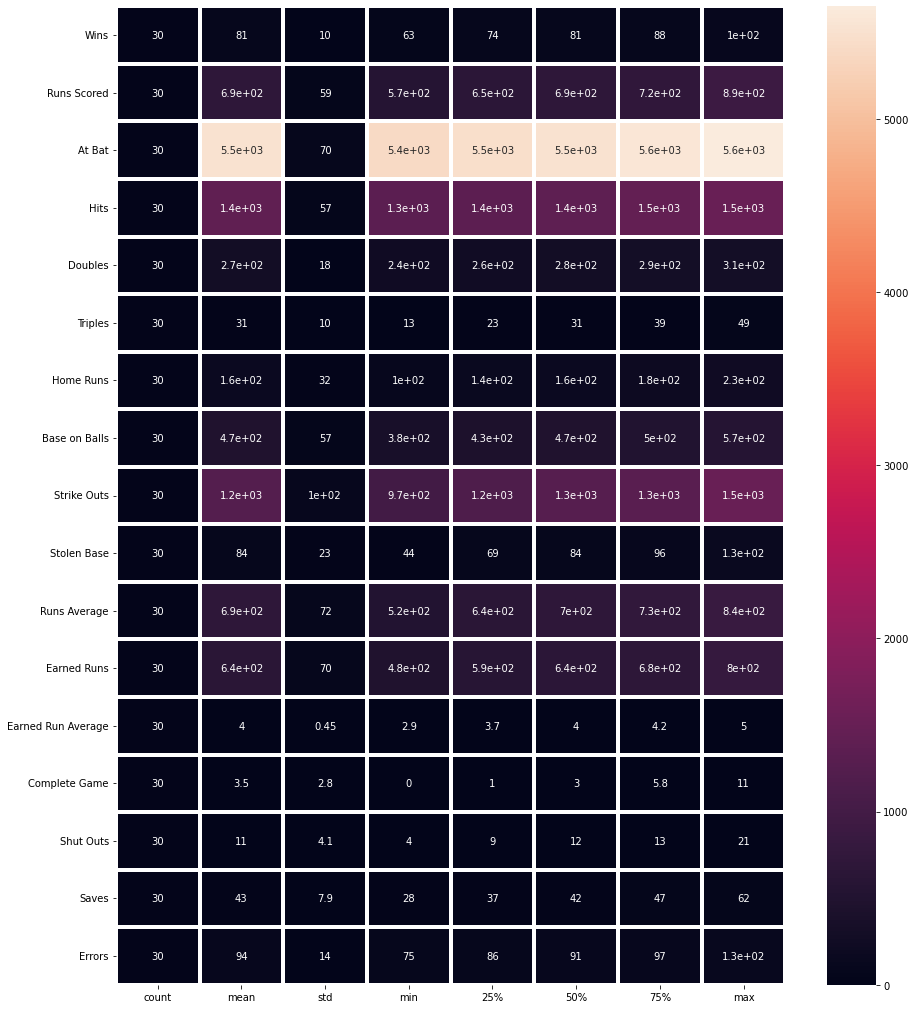

In [17]:
plt.figure(figsize=(15,18))
sns.heatmap(df.describe().T,annot=True,linecolor='white',linewidths=4)

Conclusion from the 1st part:

1)Imported the required libraries.

2)Loaded the data set.

3)Renamed the column names.

4)Used different pandas methods to know about the dataset.

5)Checked for any missing values

6)Showed the data summary.

# Univariate Analysis

Now I will start visualizing our data w.r.t graphs to understand our data really well.

Explore target variable : Wins

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: Wins, dtype: int64


<AxesSubplot:xlabel='Wins', ylabel='Density'>

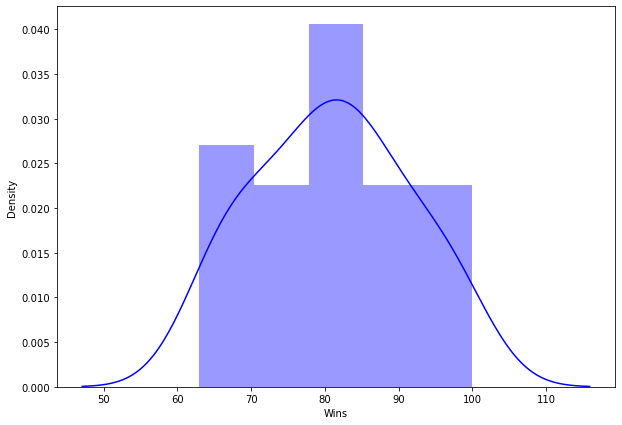

In [18]:
print(df['Wins'].value_counts())

plt.figure(figsize=(10,7))
sns.distplot(df['Wins'],color='blue')

I started with the target variable i.e Wins in which the distribution is a normal distribution and so wins is continous variables ,then the problem will be of regression type 

Explore the feature variables

In [19]:
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<AxesSubplot:xlabel='Runs Scored', ylabel='Density'>

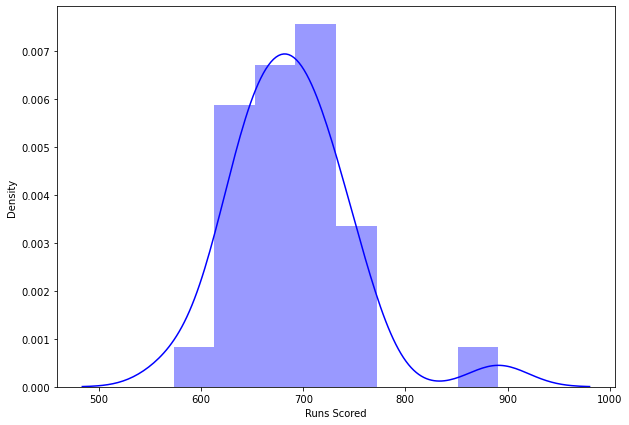

In [20]:
#Runs Scored
plt.figure(figsize=(10,7))
sns.distplot(df['Runs Scored'],color='blue')

<AxesSubplot:xlabel='At Bat', ylabel='Density'>

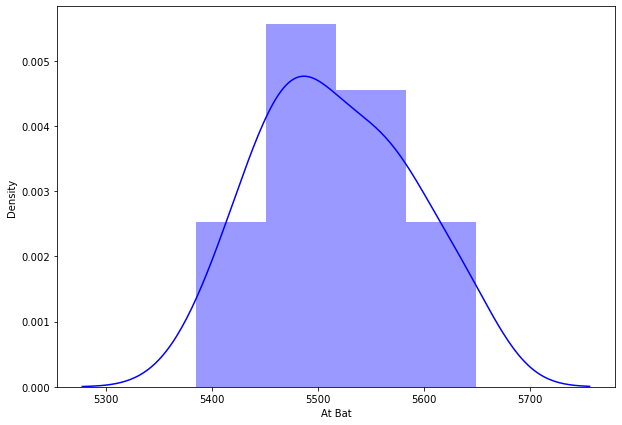

In [21]:
#At Bat
plt.figure(figsize=(10,7))
sns.distplot(df['At Bat'],color='blue')

<AxesSubplot:xlabel='Hits', ylabel='Density'>

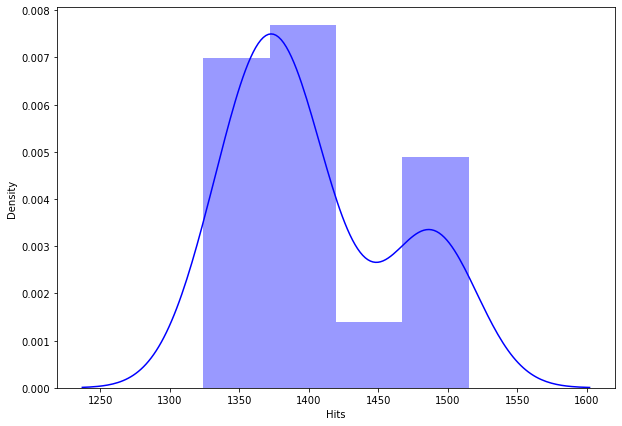

In [22]:
#Hits
plt.figure(figsize=(10,7))
sns.distplot(df['Hits'],color='blue')

<AxesSubplot:xlabel='Doubles', ylabel='Density'>

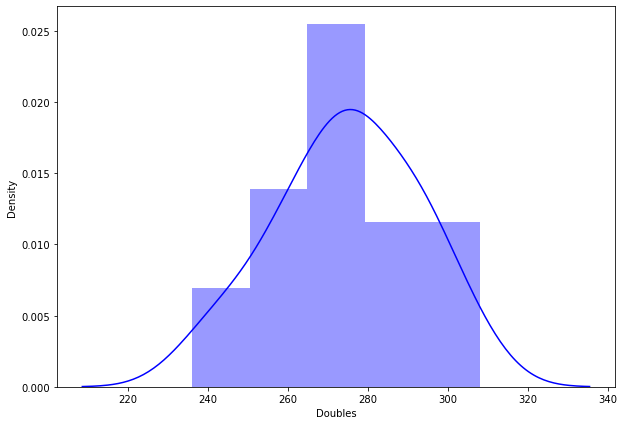

In [23]:
#Doubles
plt.figure(figsize=(10,7))
sns.distplot(df['Doubles'],color='blue')

<AxesSubplot:xlabel='Triples', ylabel='Density'>

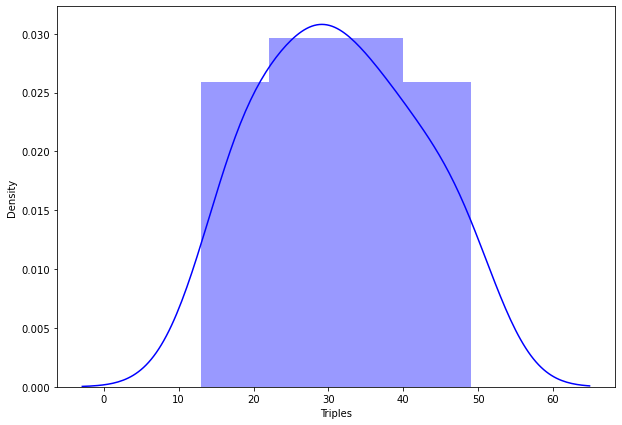

In [24]:
#Triples
plt.figure(figsize=(10,7))
sns.distplot(df['Triples'],color='blue')

<AxesSubplot:xlabel='Home Runs', ylabel='Density'>

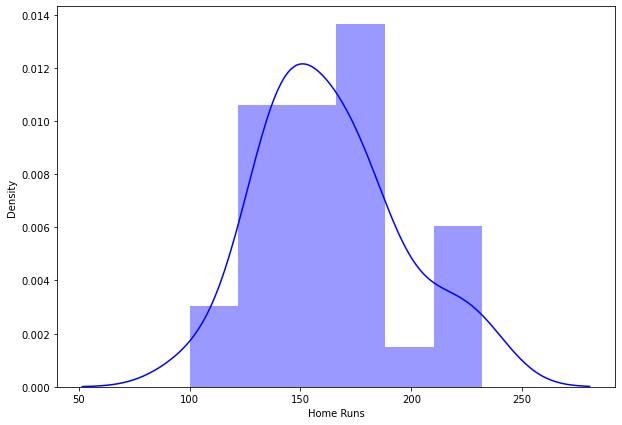

In [25]:
#Home Runs
plt.figure(figsize=(10,7))
sns.distplot(df['Home Runs'],color='blue')

<AxesSubplot:xlabel='Base on Balls', ylabel='Density'>

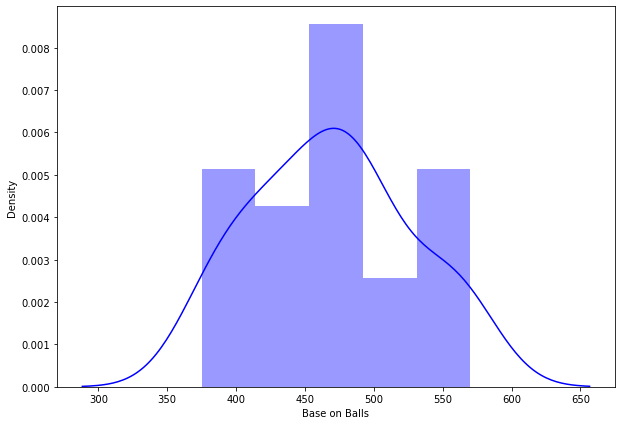

In [26]:
#Base On Balls
plt.figure(figsize=(10,7))
sns.distplot(df['Base on Balls'],color='blue')

<AxesSubplot:xlabel='Strike Outs', ylabel='Density'>

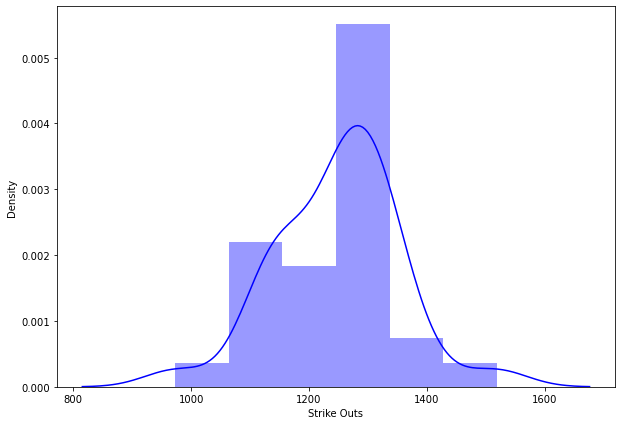

In [27]:
#Strike Outs
plt.figure(figsize=(10,7))
sns.distplot(df['Strike Outs'],color='blue')

<AxesSubplot:xlabel='Stolen Base', ylabel='Density'>

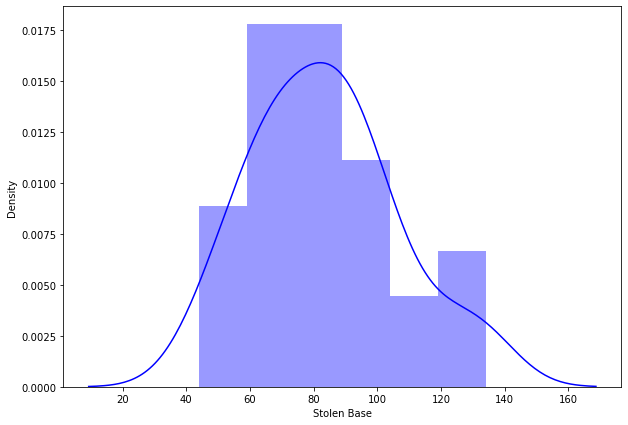

In [28]:
#Stolen Base
plt.figure(figsize=(10,7))
sns.distplot(df['Stolen Base'],color='blue')

<AxesSubplot:xlabel='Runs Average', ylabel='Density'>

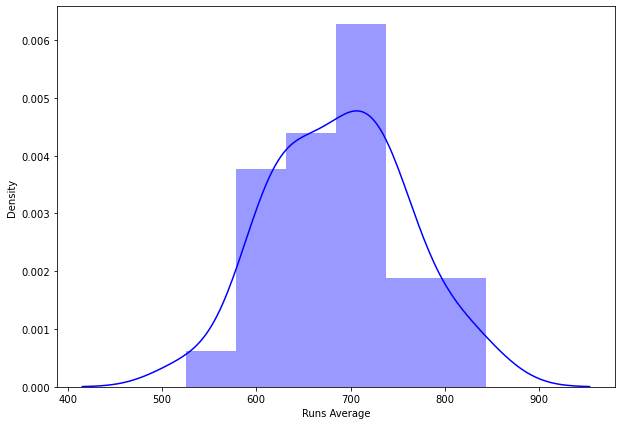

In [29]:
#Runs Average
plt.figure(figsize=(10,7))
sns.distplot(df['Runs Average'],color='blue')

<AxesSubplot:xlabel='Earned Runs', ylabel='Density'>

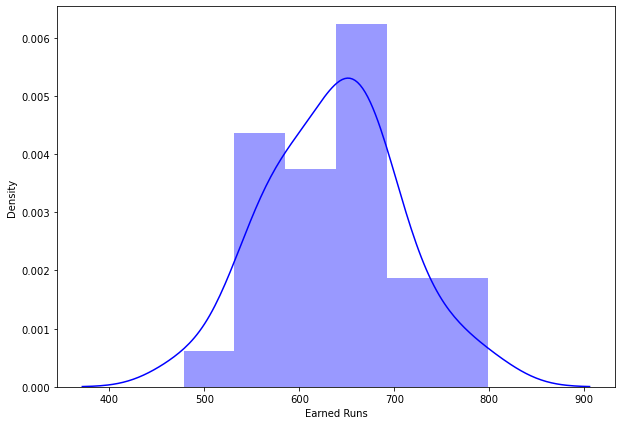

In [30]:
#Earned Runs
plt.figure(figsize=(10,7))
sns.distplot(df['Earned Runs'],color='blue')

<AxesSubplot:xlabel='Earned Run Average', ylabel='Density'>

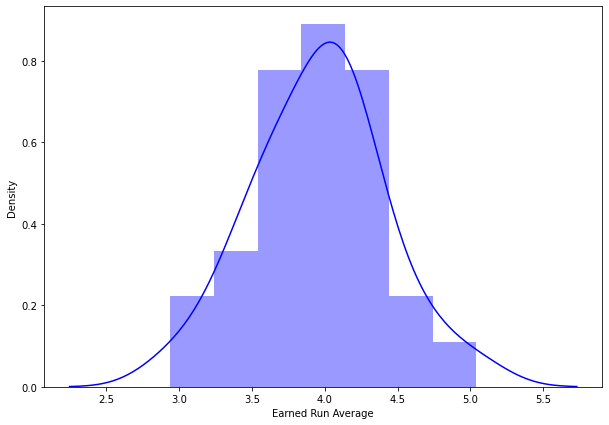

In [31]:
#Earned Run Average
plt.figure(figsize=(10,7))
sns.distplot(df['Earned Run Average'],color='blue')

<AxesSubplot:xlabel='Complete Game', ylabel='Density'>

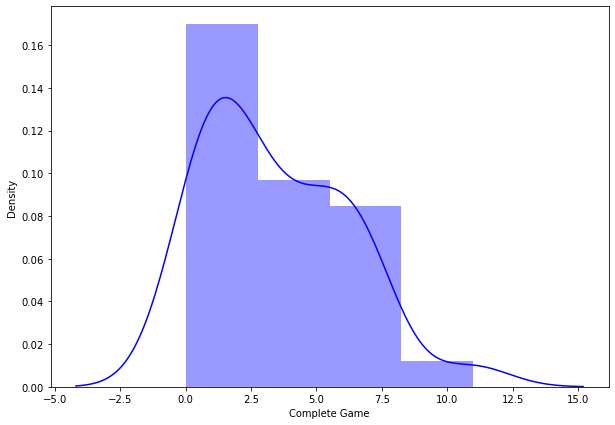

In [32]:
#Complete Game
plt.figure(figsize=(10,7))
sns.distplot(df['Complete Game'],color='blue')

<AxesSubplot:xlabel='Shut Outs', ylabel='Density'>

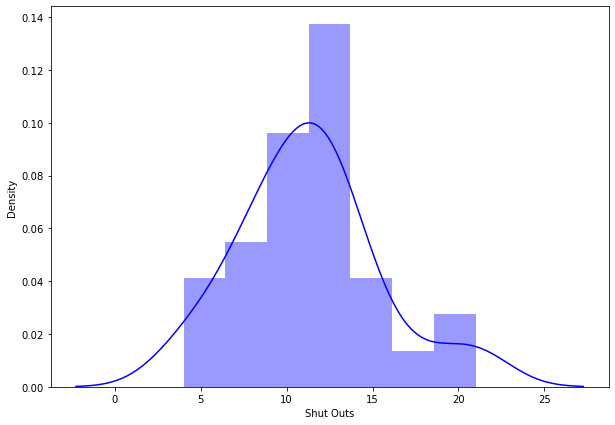

In [33]:
#Shut Outs
plt.figure(figsize=(10,7))
sns.distplot(df['Shut Outs'],color='blue')

<AxesSubplot:xlabel='Saves', ylabel='Density'>

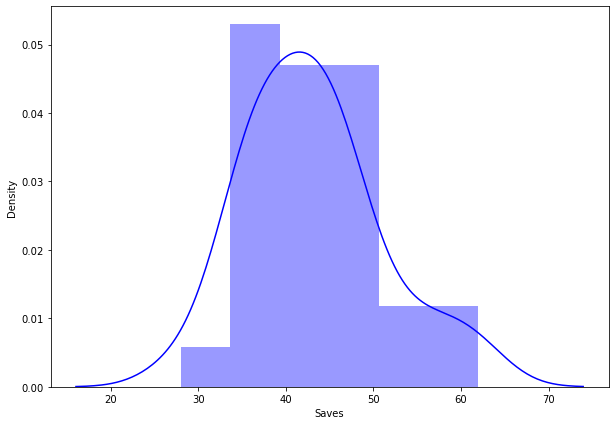

In [34]:
#Saves
plt.figure(figsize=(10,7))
sns.distplot(df['Saves'],color='blue')

<AxesSubplot:xlabel='Errors', ylabel='Density'>

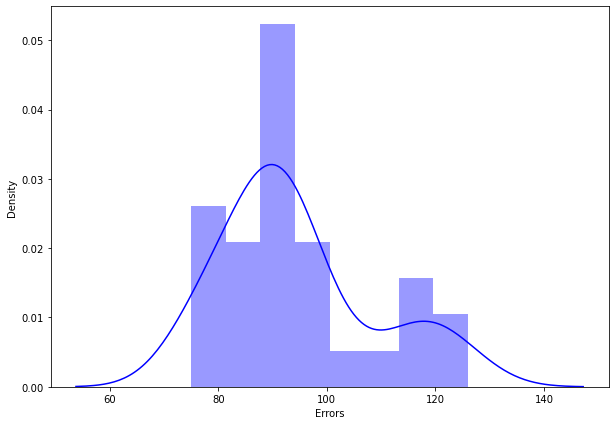

In [35]:
#Errors
plt.figure(figsize=(10,7))
sns.distplot(df['Errors'],color='blue')

In the above cells , there are few columns which are more or less similar to normal distribution whereas other columns are properly noramlly distributed.

I will check the skewness of our data.

In [36]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

Most of the feature skewness are residing in the range of +/- 0.5 whereas other features are above the specified range.If required I will check for skewness process in the latter stages.

Now I will use Histogram to visualize our data.

Histogram 

array([[<AxesSubplot:title={'center':'Wins'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

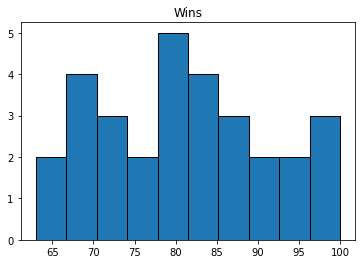

In [37]:
#Wins
plt.figure(figsize=(10,7))
df.hist(column='Wins',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Runs Scored'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

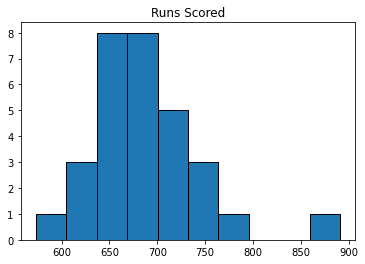

In [38]:
#Runs Scored
plt.figure(figsize=(10,7))
df.hist(column='Runs Scored',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'At Bat'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

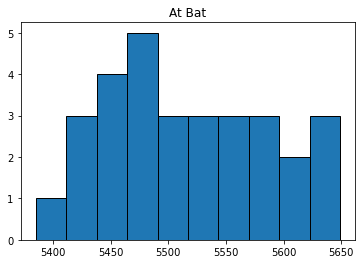

In [39]:
#At Bat
plt.figure(figsize=(10,7))
df.hist(column='At Bat',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Hits'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

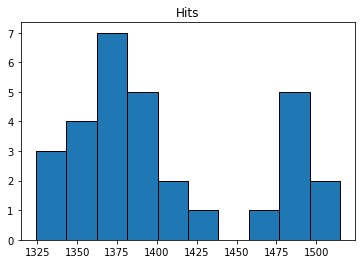

In [40]:
#Hits
plt.figure(figsize=(10,7))
df.hist(column='Hits',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Doubles'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

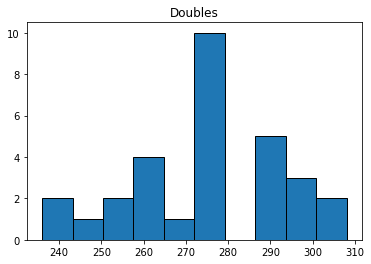

In [41]:
#Doubles
plt.figure(figsize=(10,7))
df.hist(column='Doubles',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Triples'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

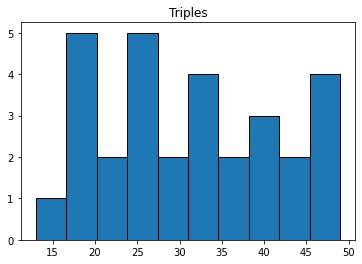

In [42]:
#Triples
plt.figure(figsize=(10,7))
df.hist(column='Triples',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Home Runs'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

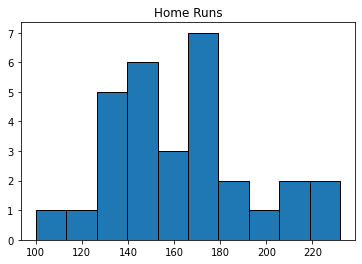

In [43]:
#Home Runs
plt.figure(figsize=(10,7))
df.hist(column='Home Runs',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Base on Balls'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

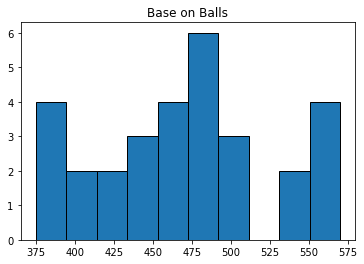

In [44]:
#Base on Balls
plt.figure(figsize=(10,7))
df.hist(column='Base on Balls',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Strike Outs'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

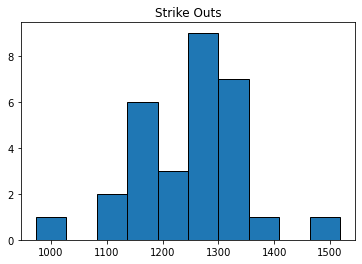

In [45]:
#Strike Outs
plt.figure(figsize=(10,7))
df.hist(column='Strike Outs',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Stolen Base'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

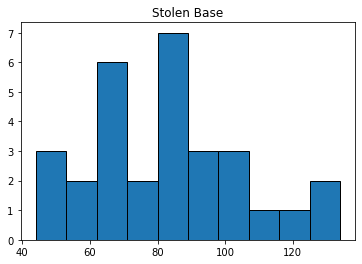

In [46]:
#Stolen Base
plt.figure(figsize=(10,7))
df.hist(column='Stolen Base',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Runs Average'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

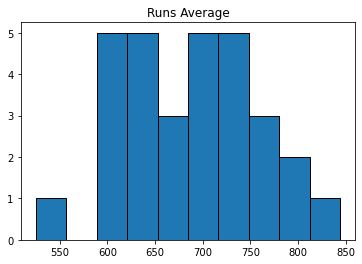

In [47]:
#Runs Average
plt.figure(figsize=(10,7))
df.hist(column='Runs Average',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Earned Runs'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

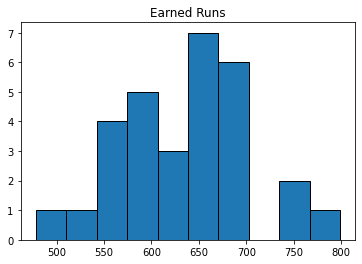

In [48]:
#Earned Runs
plt.figure(figsize=(10,7))
df.hist(column='Earned Runs',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Earned Run Average'}>]],
      dtype=object)

<Figure size 720x504 with 0 Axes>

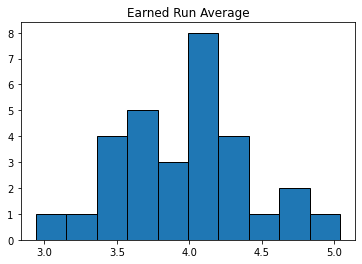

In [49]:
#Earned Run Average
plt.figure(figsize=(10,7))
df.hist(column='Earned Run Average',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Complete Game'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

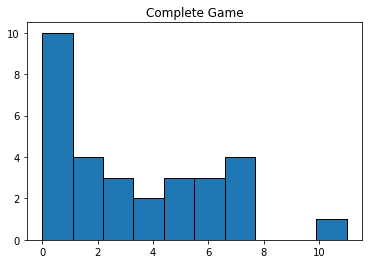

In [50]:
#Complete Game
plt.figure(figsize=(10,7))
df.hist(column='Complete Game',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Shut Outs'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

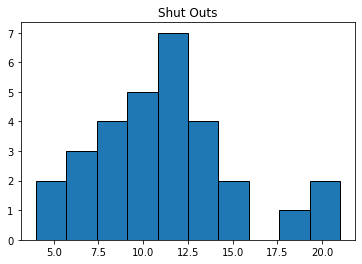

In [51]:
#Shut Outs
plt.figure(figsize=(10,7))
df.hist(column='Shut Outs',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Saves'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

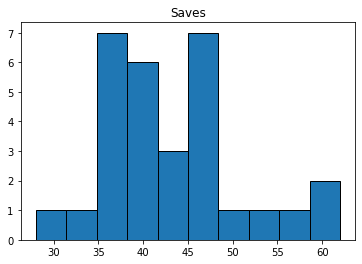

In [52]:
#Saves
plt.figure(figsize=(10,7))
df.hist(column='Saves',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Errors'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

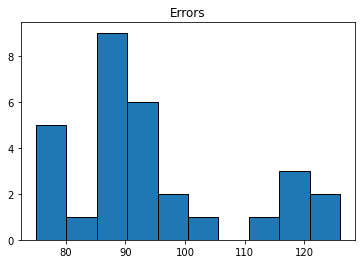

In [53]:
#Errors
plt.figure(figsize=(10,7))
df.hist(column='Errors',grid=False,edgecolor='black')

I have completed Univariate Analysis part by using the methods of Density plot and Histogram.Now I will proceed to bivariate analysis part to check the relationship of features with the target variable.

# Bivariate Analysis

I will start with the Bar Plot.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

# BAR PlOT

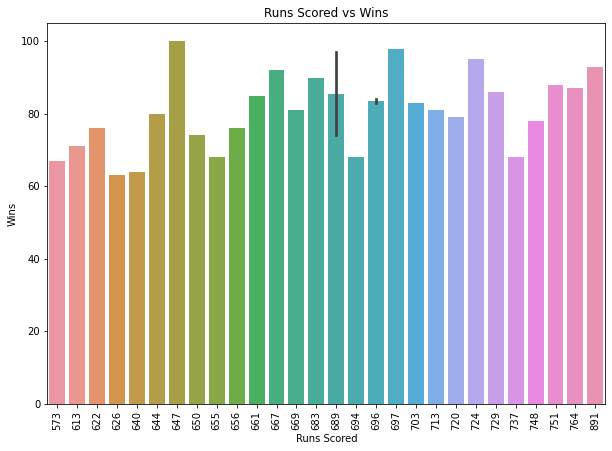

In [54]:
plt.figure(figsize=(10,7))
sns.barplot(df['Runs Scored'],df['Wins'])
plt.title('Runs Scored vs Wins')
plt.xlabel('Runs Scored')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

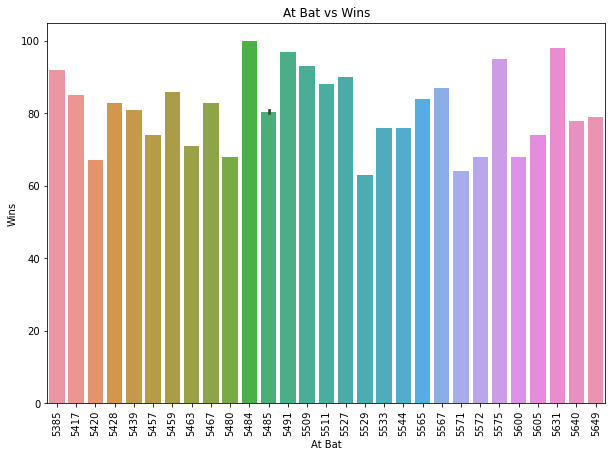

In [55]:
plt.figure(figsize=(10,7))
sns.barplot(df['At Bat'],df['Wins'])
plt.title('At Bat vs Wins')
plt.xlabel('At Bat')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

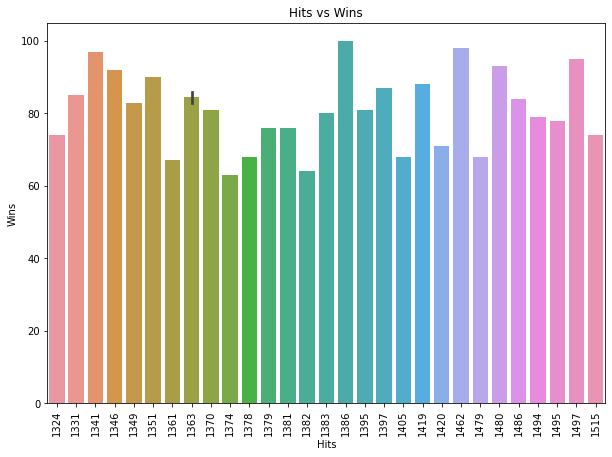

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(df['Hits'],df['Wins'])
plt.title('Hits vs Wins')
plt.xlabel('Hits')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

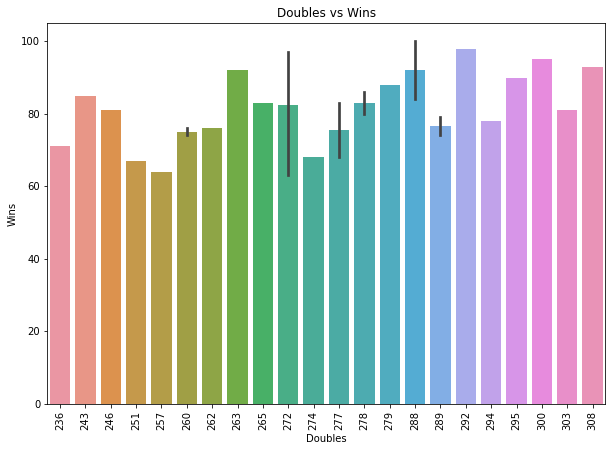

In [57]:
plt.figure(figsize=(10,7))
sns.barplot(df['Doubles'],df['Wins'])
plt.title('Doubles vs Wins')
plt.xlabel('Doubles')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

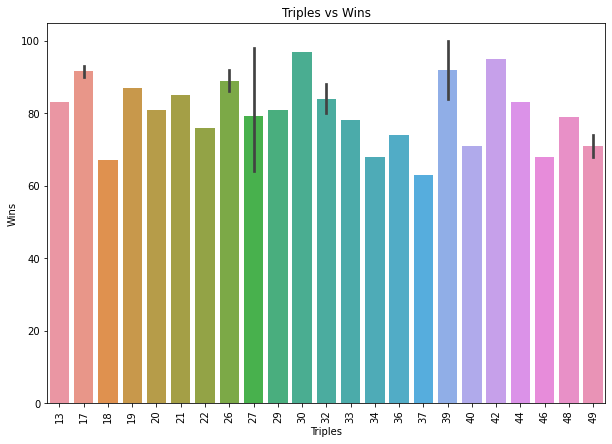

In [58]:
plt.figure(figsize=(10,7))
sns.barplot(df['Triples'],df['Wins'])
plt.title('Triples vs Wins')
plt.xlabel('Triples')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

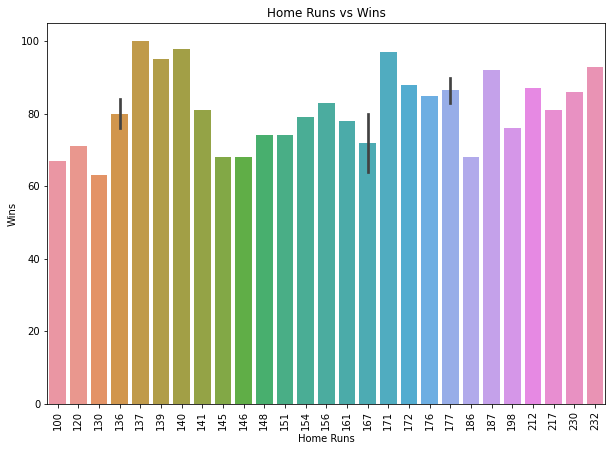

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(df['Home Runs'],df['Wins'])
plt.title('Home Runs vs Wins')
plt.xlabel('Home Runs')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

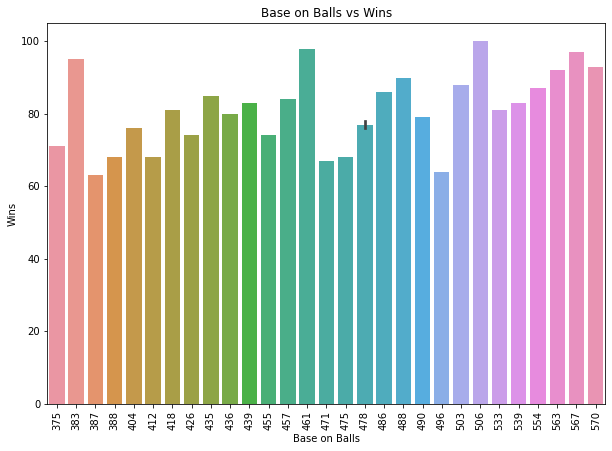

In [60]:
plt.figure(figsize=(10,7))
sns.barplot(df['Base on Balls'],df['Wins'])
plt.title('Base on Balls vs Wins')
plt.xlabel('Base on Balls')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

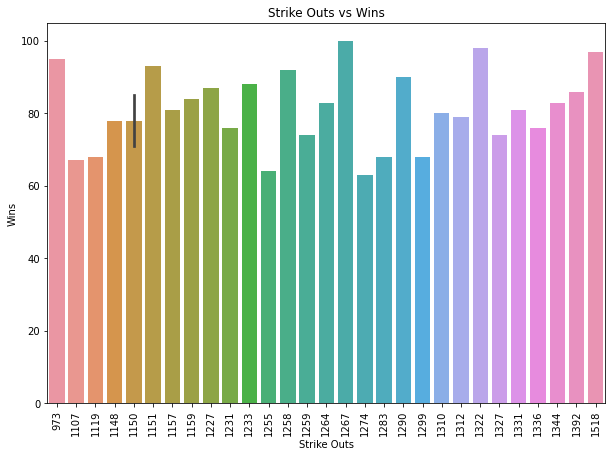

In [61]:
plt.figure(figsize=(10,7))
sns.barplot(df['Strike Outs'],df['Wins'])
plt.title('Strike Outs vs Wins')
plt.xlabel('Strike Outs')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

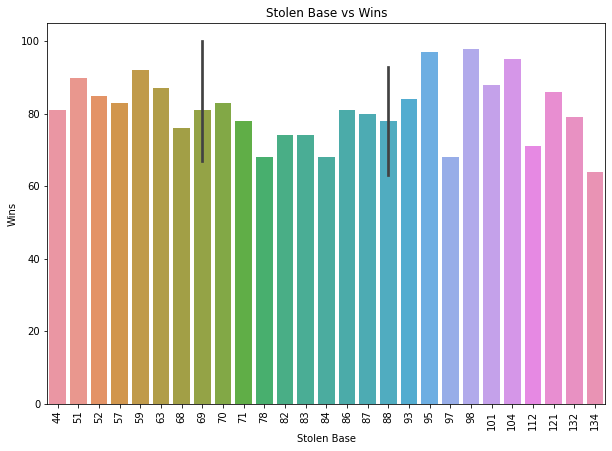

In [62]:
plt.figure(figsize=(10,7))
sns.barplot(df['Stolen Base'],df['Wins'])
plt.title('Stolen Base vs Wins')
plt.xlabel('Stolen Base')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

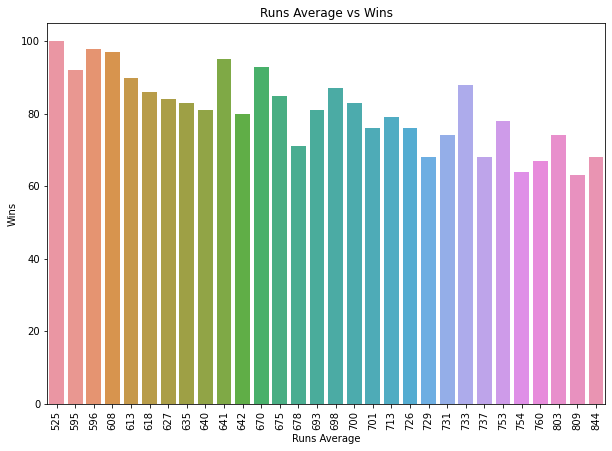

In [63]:
plt.figure(figsize=(10,7))
sns.barplot(df['Runs Average'],df['Wins'])
plt.title('Runs Average vs Wins')
plt.xlabel('Runs Average')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

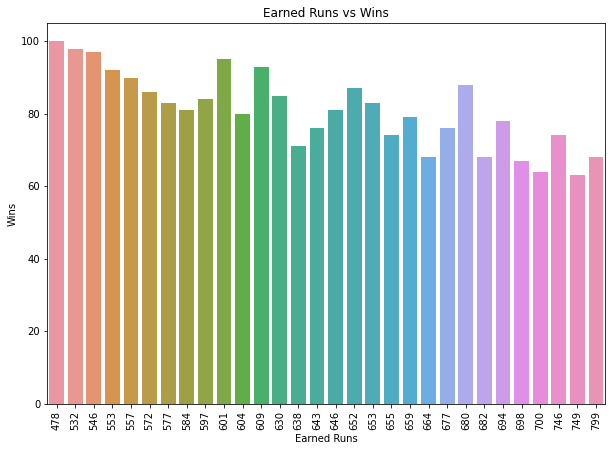

In [64]:
plt.figure(figsize=(10,7))
sns.barplot(df['Earned Runs'],df['Wins'])
plt.title('Earned Runs vs Wins')
plt.xlabel('Earned Runs')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

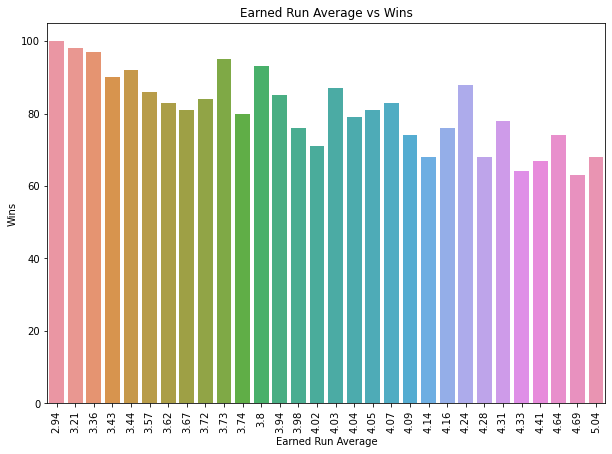

In [65]:
plt.figure(figsize=(10,7))
sns.barplot(df['Earned Run Average'],df['Wins'])
plt.title('Earned Run Average vs Wins')
plt.xlabel('Earned Run Average')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

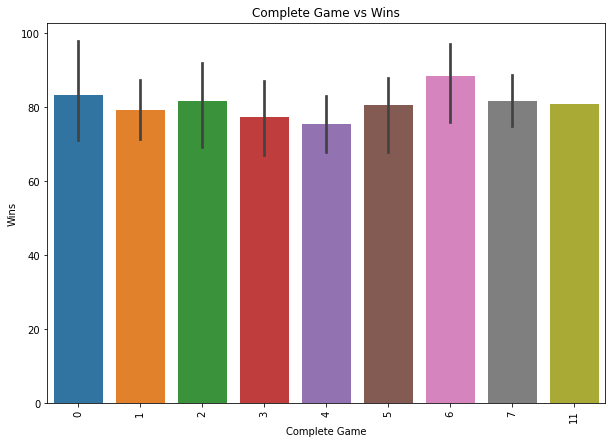

In [66]:
plt.figure(figsize=(10,7))
sns.barplot(df['Complete Game'],df['Wins'])
plt.title('Complete Game vs Wins')
plt.xlabel('Complete Game')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

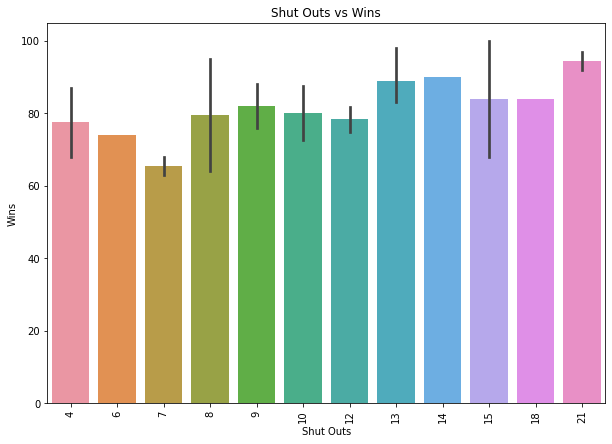

In [67]:
plt.figure(figsize=(10,7))
sns.barplot(df['Shut Outs'],df['Wins'])
plt.title('Shut Outs vs Wins')
plt.xlabel('Shut Outs')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

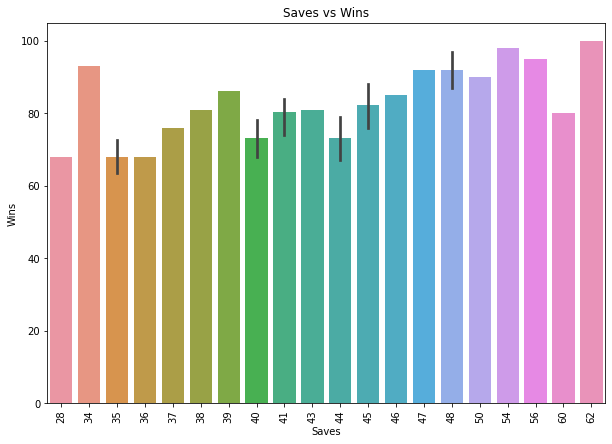

In [68]:
plt.figure(figsize=(10,7))
sns.barplot(df['Saves'],df['Wins'])
plt.title('Saves vs Wins')
plt.xlabel('Saves')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

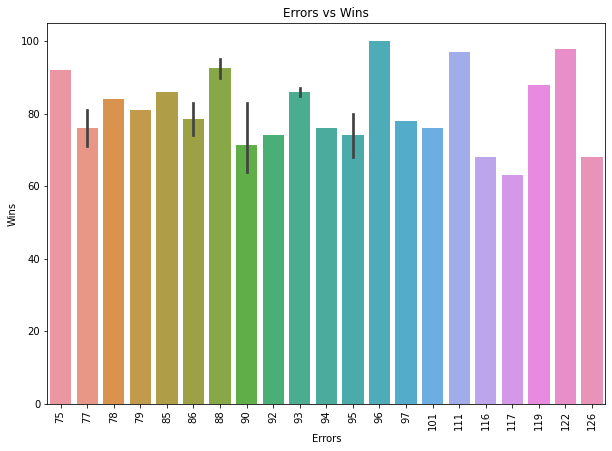

In [69]:
plt.figure(figsize=(10,7))
sns.barplot(df['Errors'],df['Wins'])
plt.title('Errors vs Wins')
plt.xlabel('Errors')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()

The second method is to visualize by using a line plot.

Draw a line plot with possibility of several semantic groupings

# LINE PLOT

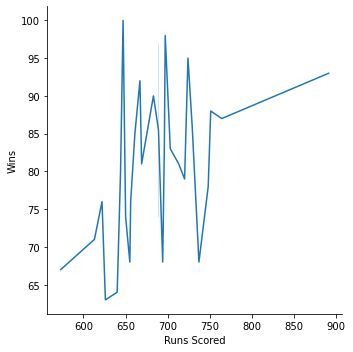

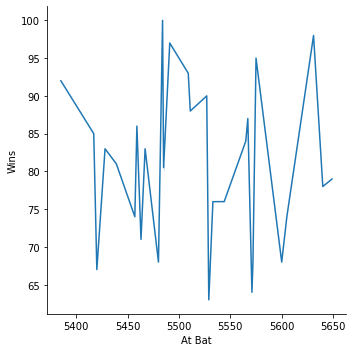

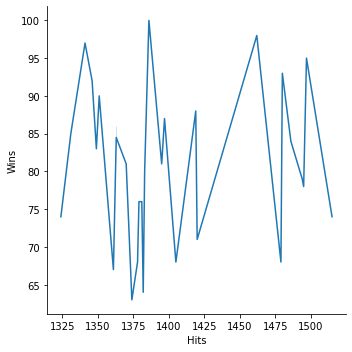

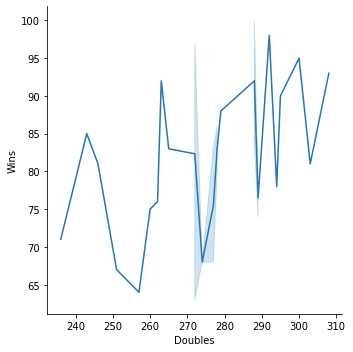

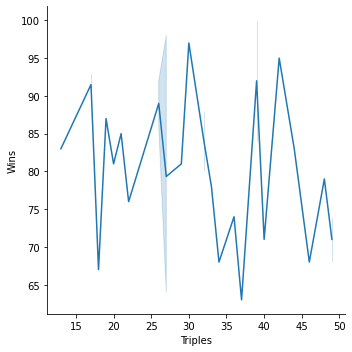

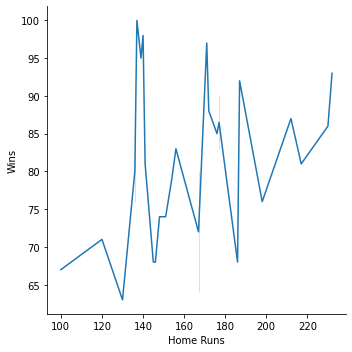

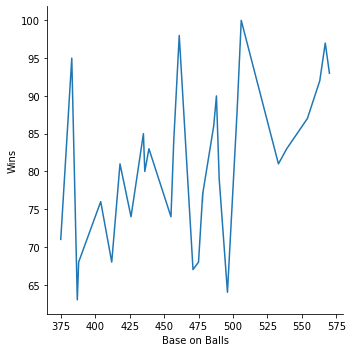

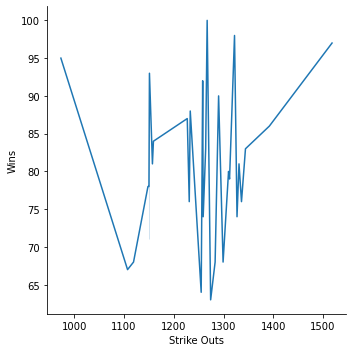

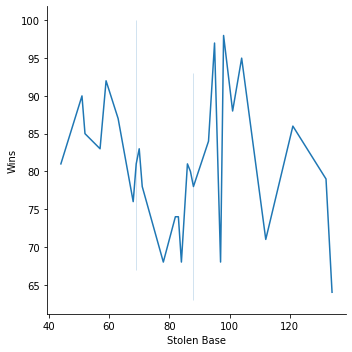

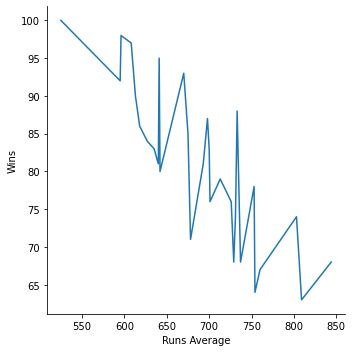

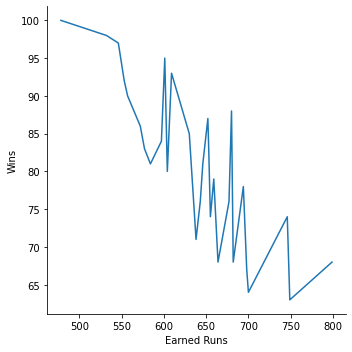

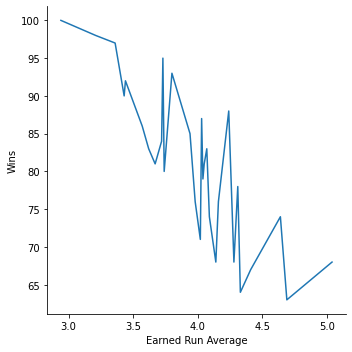

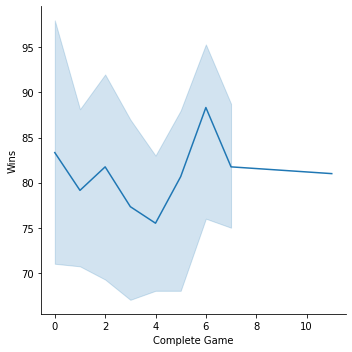

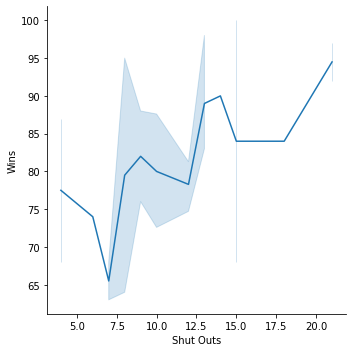

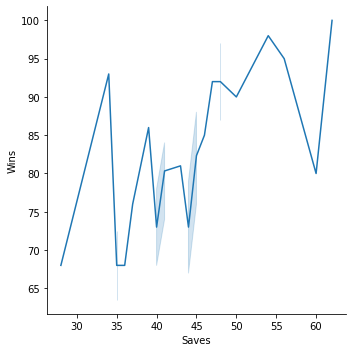

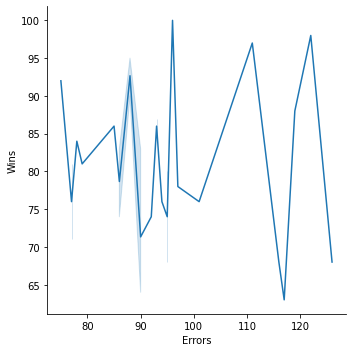

In [70]:
plot = 0
features = df.drop("Wins", axis=1)
for c, v in features.items():
    sns.relplot(x=c, y="Wins", kind="line", data=df)
    plot += 1
plt.show()

By taking a look at all the line plots corresponding to the "Wins" column shows how those feature are related with the contribution on getting those particular numbers. Some of them are directly proportional while others are either inversely proportional to our label or do not have much to offer.

Therefore we can say that the relationships between the label and all the features can be viewed from above graphs: All of the above features (except the errors) are positively correlated with our label In case the number of runs increases then the chance of win increases obviously In case the doubles increase then the chance of win increases In case the triples increases then the chance of win increases In case the home runs increases then the chance of win increases In case the walks on balls increases then the chance of win increases In case the strike outs increases then the chance of win increases for the opposite team In case the stolen bases increases then the chance of win increases again for the opposite team In case the runs allowed increases then the chance of win increases In case the earned run and earned run average increases the chance of win increases automatically

----------------------------------------------------------------------------------------------------------------------------------

The 3rd method to visualize data is by using a scatter plot.

Draw a scatter plot with possibility of several semantic groupings.

# SCATTER PLOT

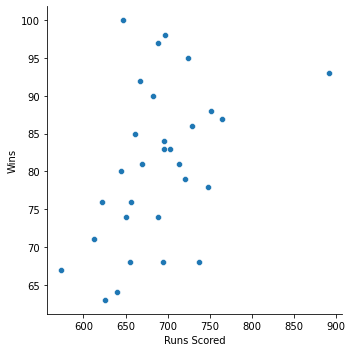

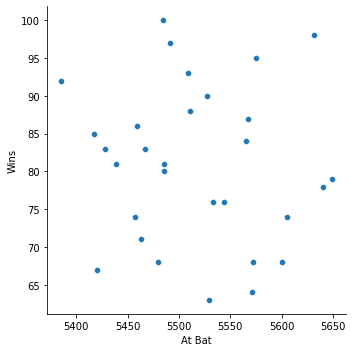

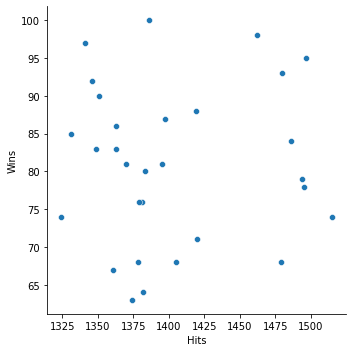

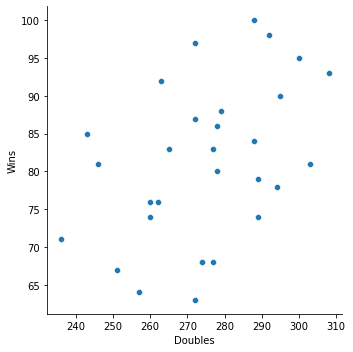

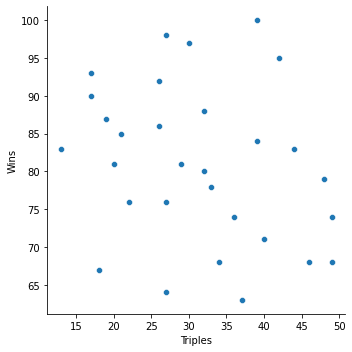

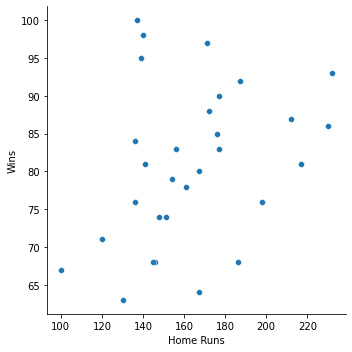

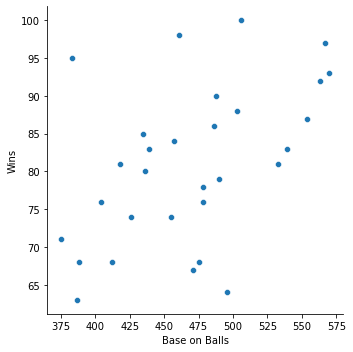

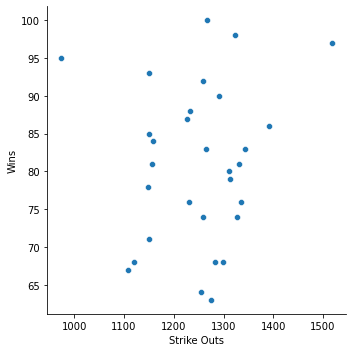

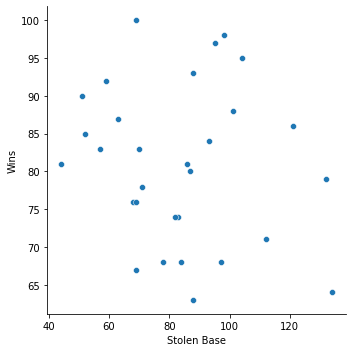

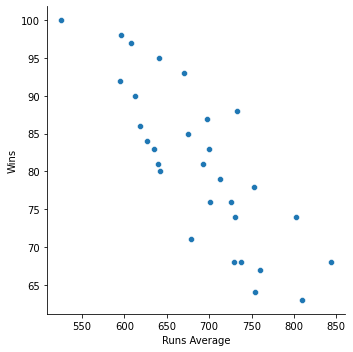

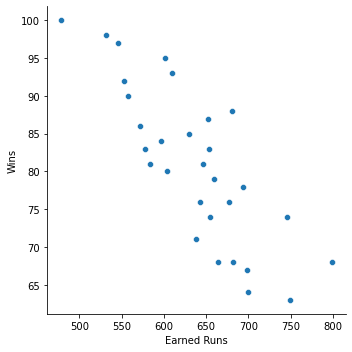

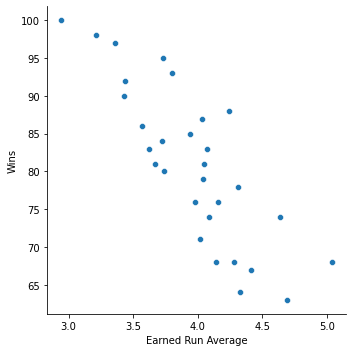

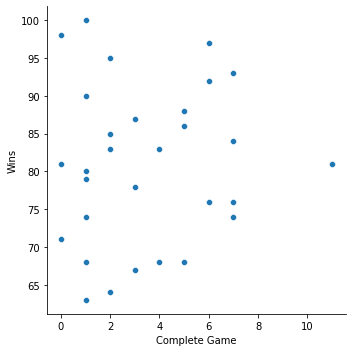

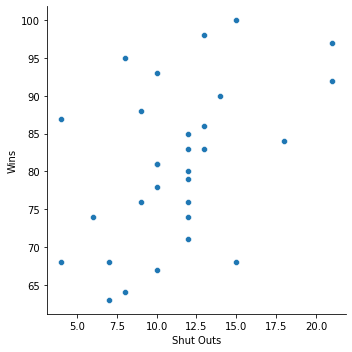

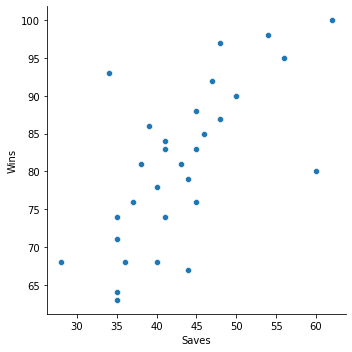

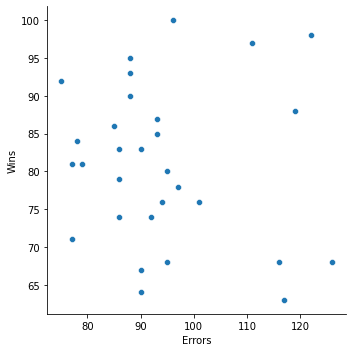

In [71]:
plot = 0
features = df.drop("Wins", axis=1)
for c, v in features.items():
    sns.relplot(x=c, y="Wins", kind="scatter", data=df)
    plot += 1
plt.show()

4Th method to visualize data is by using a joint plot

# JOINT PLOT

Draw a plot of two variables with bivariate and univariate graphs.

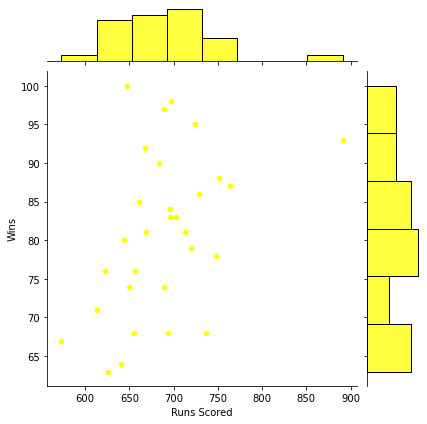

In [72]:
sns.jointplot(x='Runs Scored',y='Wins',data=df,kind='scatter',color='yellow')

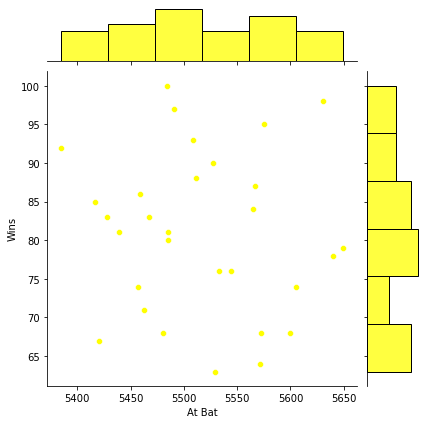

In [73]:
sns.jointplot(x='At Bat',y='Wins',data=df,color='yellow',kind='scatter')

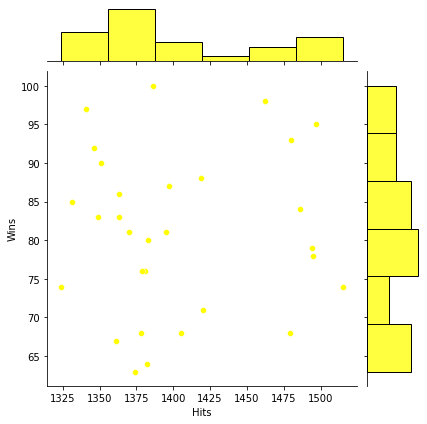

In [74]:
sns.jointplot(x='Hits',y='Wins',data=df,kind='scatter',color='yellow')

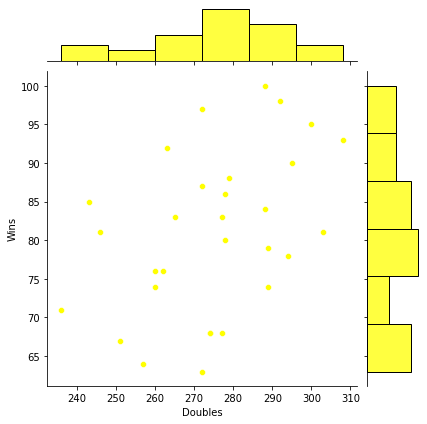

In [75]:
sns.jointplot(x='Doubles',y='Wins',data=df,kind='scatter',color='yellow')

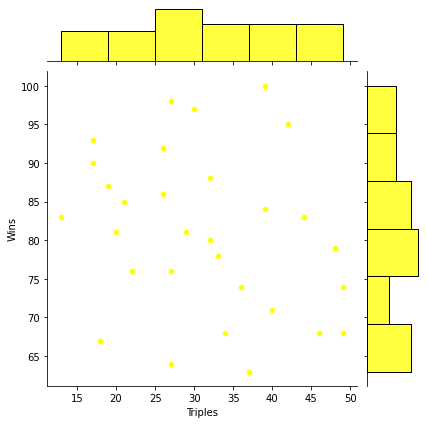

In [76]:
sns.jointplot(x='Triples',y='Wins',data=df,kind='scatter',color='yellow')

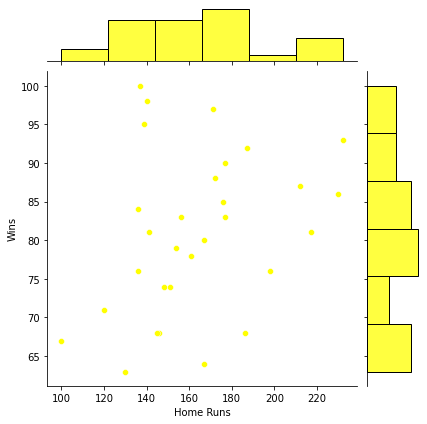

In [77]:
sns.jointplot(x='Home Runs',y='Wins',data=df,kind='scatter',color='yellow')

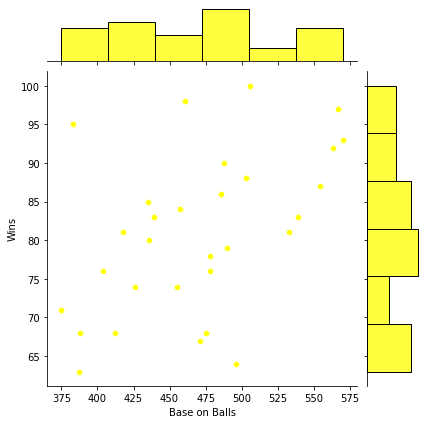

In [78]:
sns.jointplot(x='Base on Balls',y='Wins',data=df,kind='scatter',color='yellow')

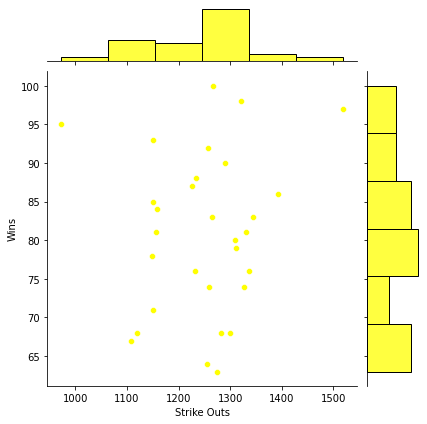

In [79]:
sns.jointplot(x='Strike Outs',y='Wins',data=df,kind='scatter',color='yellow')

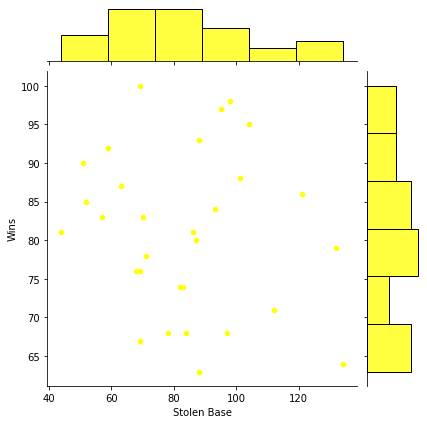

In [80]:
sns.jointplot(x='Stolen Base',y='Wins',data=df,kind='scatter',color='yellow')

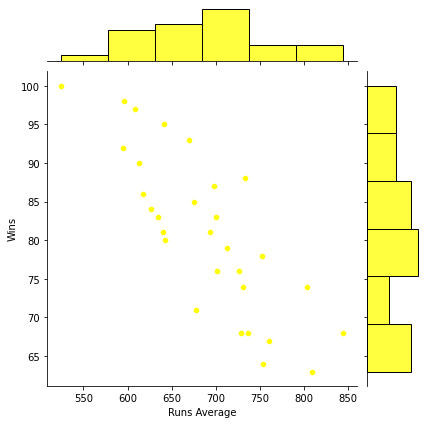

In [81]:
sns.jointplot(x='Runs Average',y='Wins',data=df,kind='scatter',color='yellow')

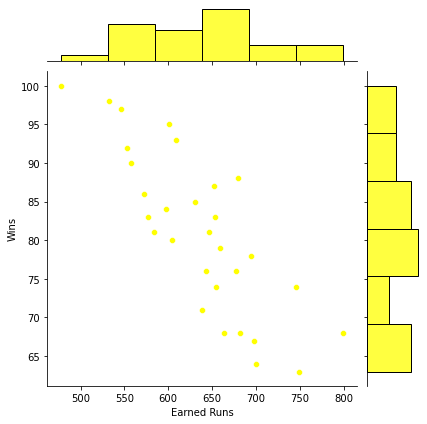

In [82]:
sns.jointplot(x='Earned Runs',y='Wins',data=df,kind='scatter',color='yellow')

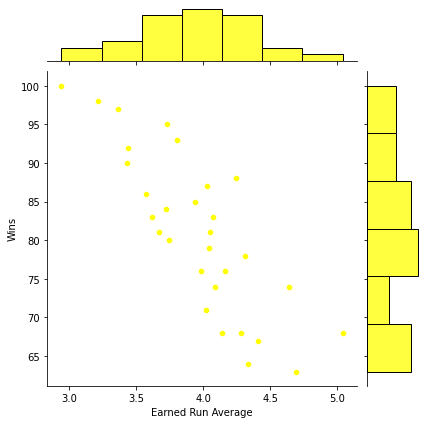

In [83]:
sns.jointplot(x='Earned Run Average',y='Wins',data=df,kind='scatter',color='yellow')

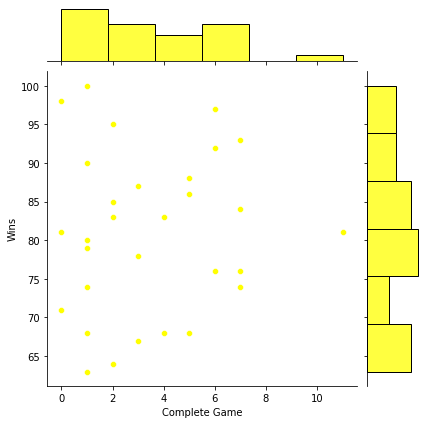

In [84]:
sns.jointplot(x='Complete Game',y='Wins',data=df,kind='scatter',color='yellow')

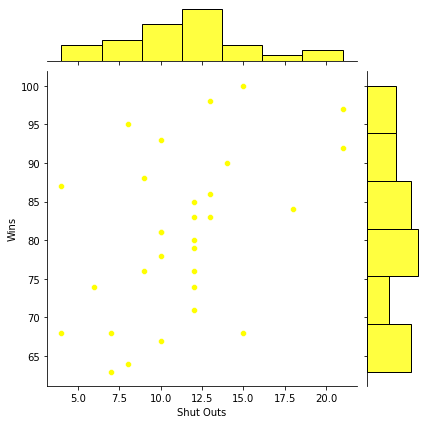

In [85]:
sns.jointplot(x='Shut Outs',y='Wins',data=df,kind='scatter',color='yellow')

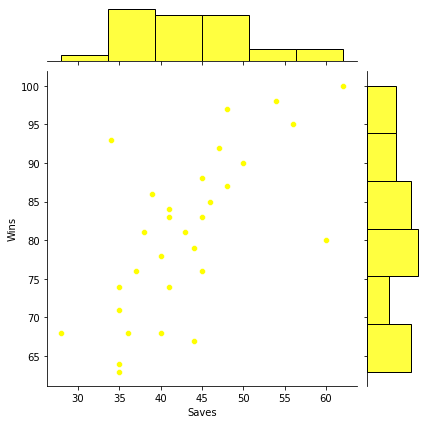

In [86]:
sns.jointplot(x='Saves',y='Wins',data=df,kind='scatter',color='yellow')

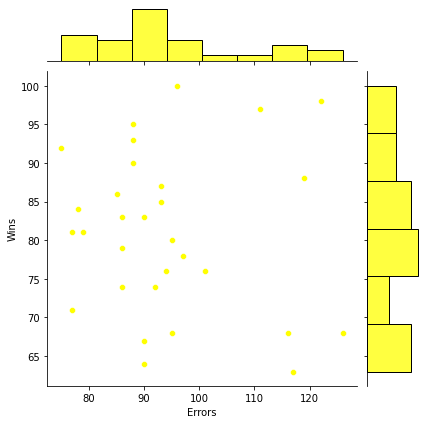

In [87]:
sns.jointplot(x='Errors',y='Wins',data=df,kind='scatter',color='yellow')

# OUTLIERS

We don't have to do encoding because there are no categorical values present.Let's proceed to oultier detection 

For outlier detection , we will use the boxplot to check for outliers

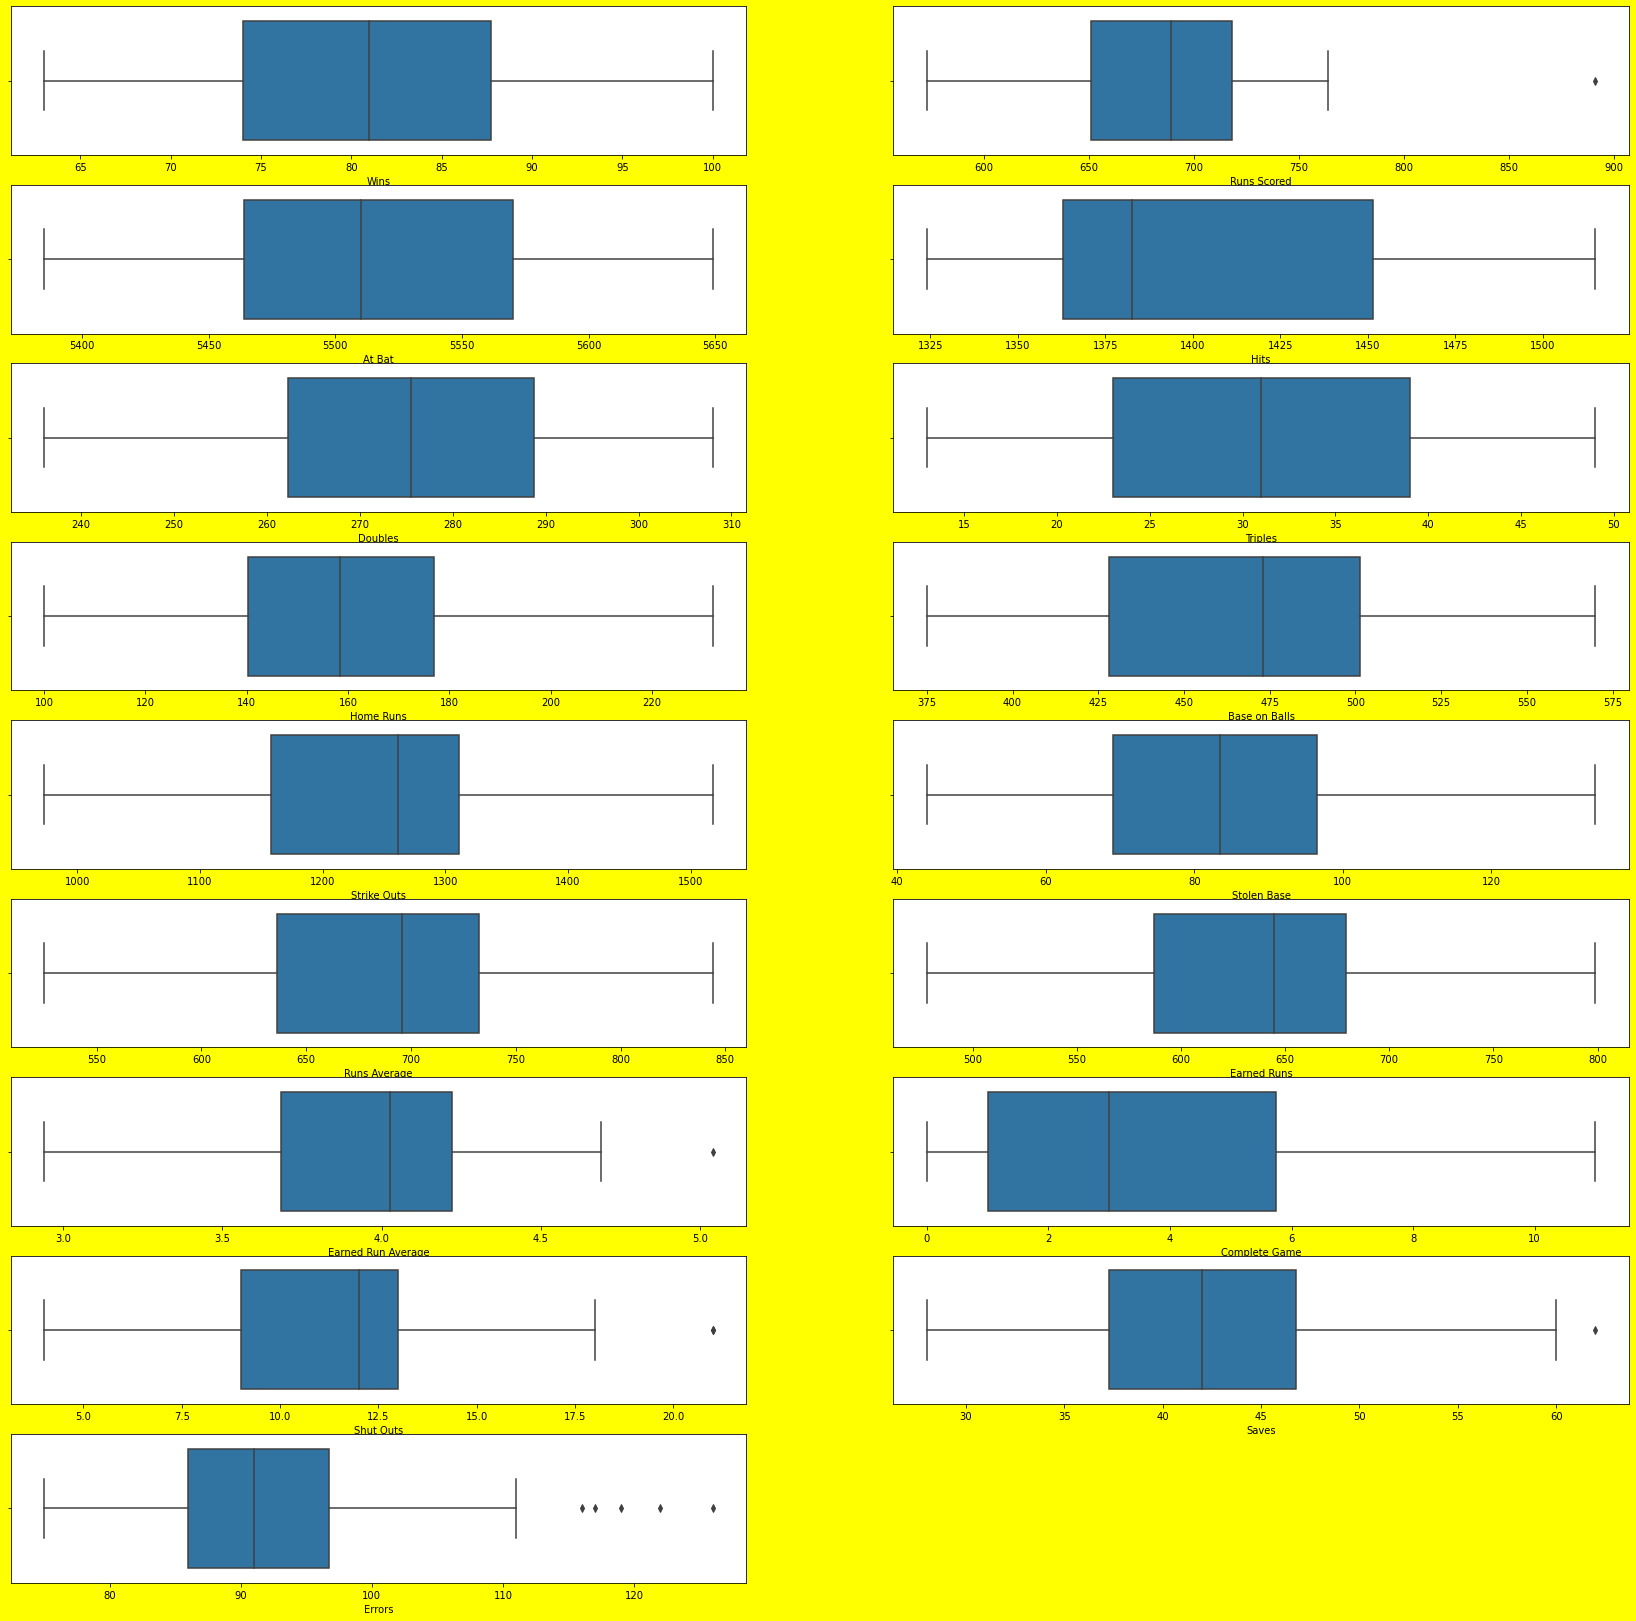

In [88]:
plt.figure(figsize=(29,29),facecolor='yellow')
plotno = 1
for i in df:
    if plotno <= 18:
        ax = plt.subplot(9,2,plotno)
        sns.boxplot(df[i])
    plotno += 1
plt.show()

Outliers are present in columns like 'Errors','Shut Outs','Saves','Earned Run Average','Runs Scored'.But there are not to many outliers present in it.So we will just replace outilers in 'Error' column.Other columns with negligible outliers will no affect our model approach.

Errors

In [89]:
print(df.quantile(0.10))
print(df.quantile(0.90))

Wins                    67.900
Runs Scored            625.600
At Bat                5427.200
Hits                  1345.500
Doubles                250.500
Triples                 17.900
Home Runs              135.400
Base on Balls          387.900
Strike Outs           1145.100
Stolen Base             56.500
Runs Average           606.800
Earned Runs            552.300
Earned Run Average       3.423
Complete Game            0.900
Shut Outs                6.900
Saves                   35.000
Errors                  77.900
Name: 0.1, dtype: float64
Wins                    95.200
Runs Scored            748.300
At Bat                5607.600
Hits                  1494.100
Doubles                295.500
Triples                 46.200
Home Runs              212.500
Base on Balls          554.900
Strike Outs           1336.800
Stolen Base            112.900
Runs Average           764.300
Earned Runs            704.600
Earned Run Average       4.433
Complete Game            7.000
Shut Outs    

In [90]:
#df[Error][0.10] == 77.900 ,df[Error][0.90] = 117.200
df['Errors'] = np.where(df['Errors'] > 117.200,117.200,df['Errors'])

<AxesSubplot:xlabel='Errors'>

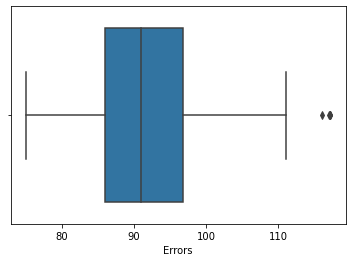

In [91]:
sns.boxplot(df['Errors'])

Lets see the distribution of dataset when we use boxplot.

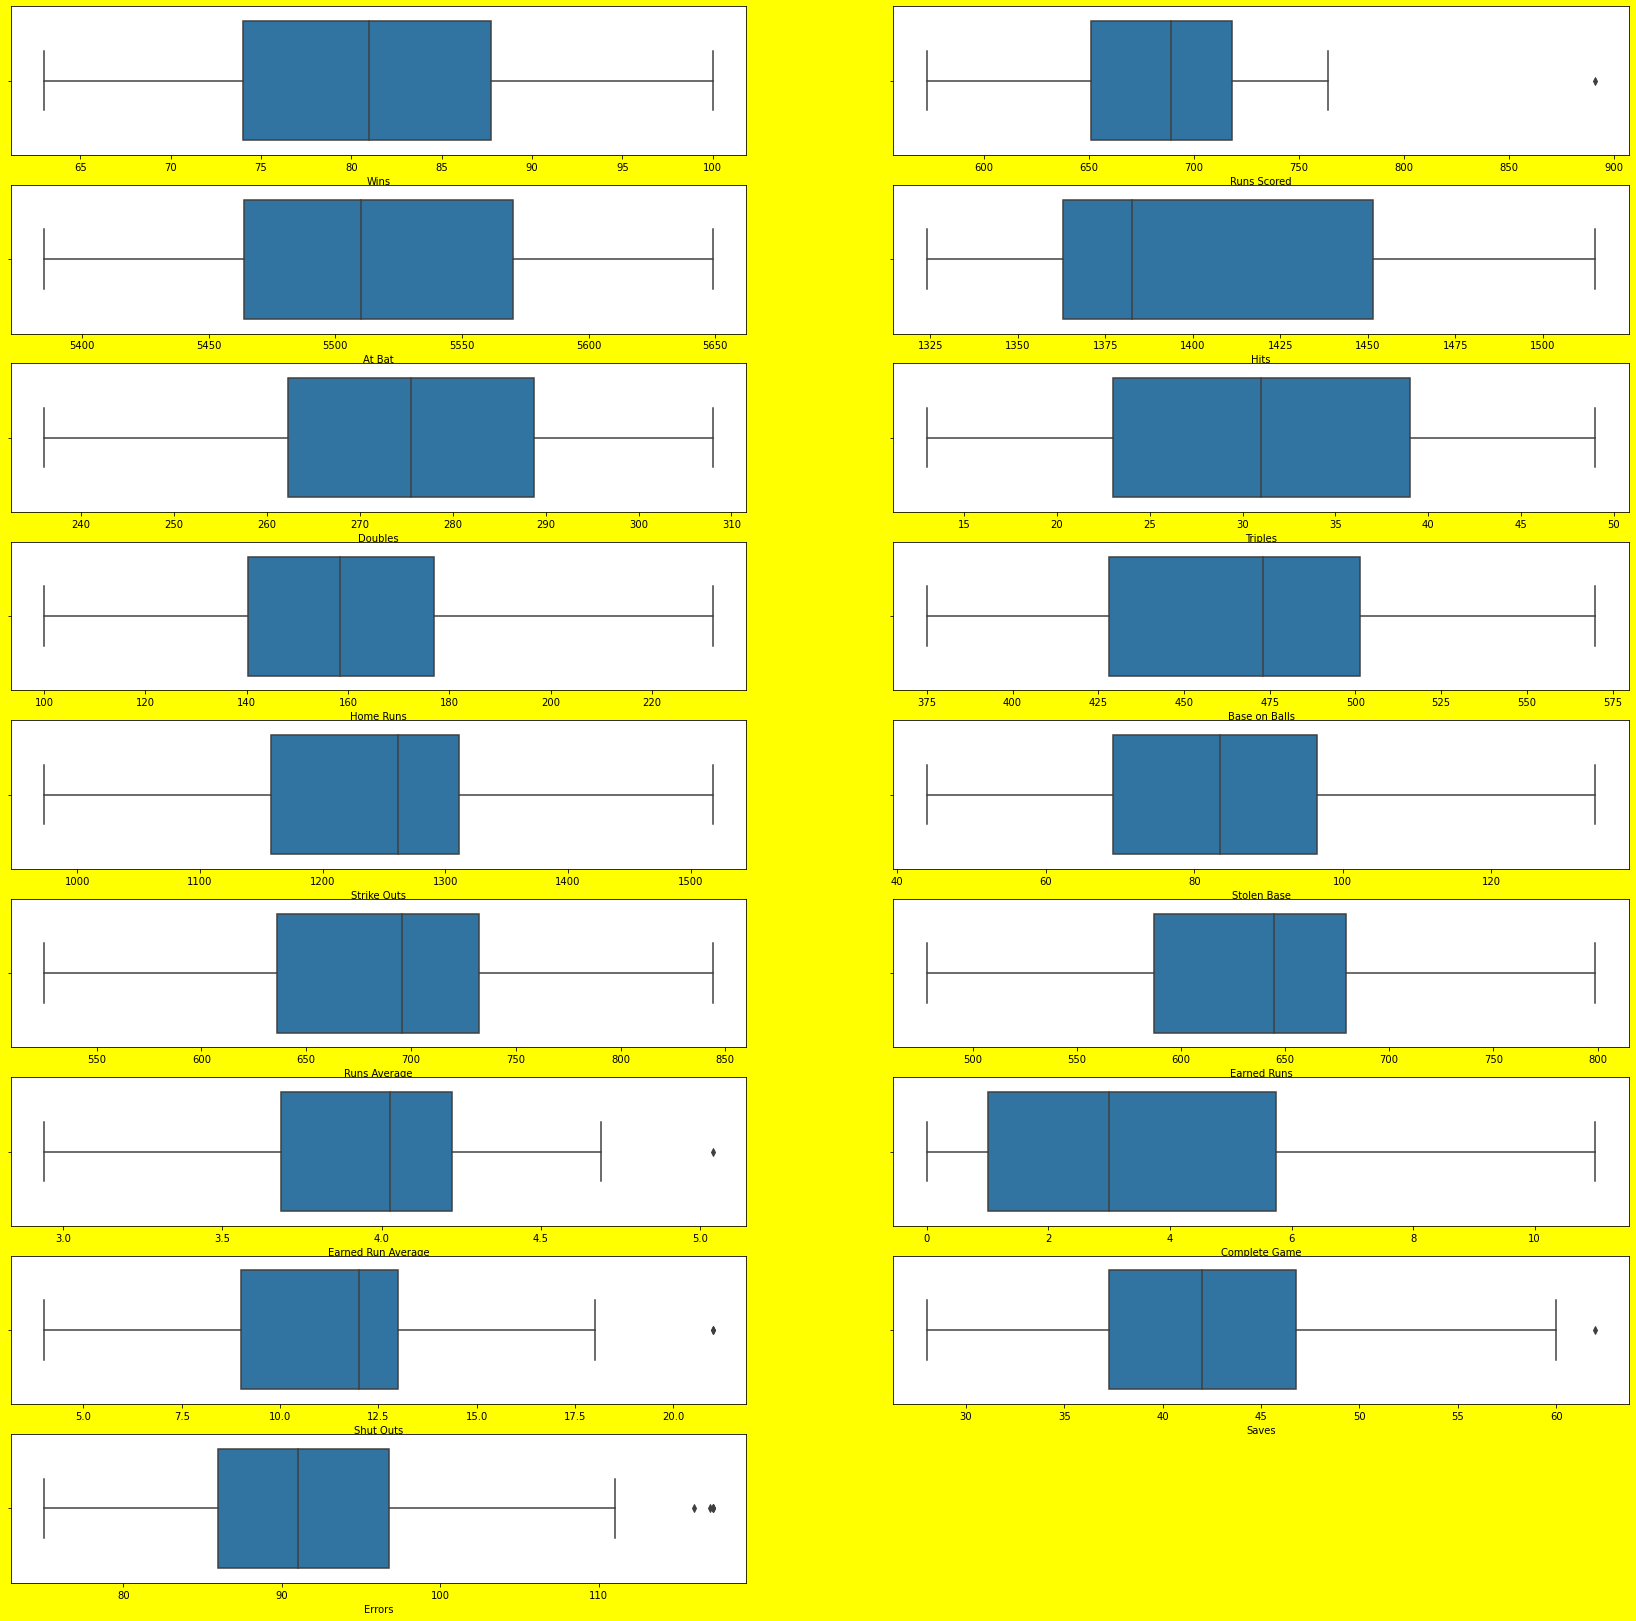

In [94]:
plt.figure(figsize=(29,29),facecolor='yellow')
plotno = 1
for i in df:
    if plotno <= 18:
        ax = plt.subplot(9,2,plotno)
        sns.boxplot(df[i])
    plotno += 1
plt.show()

# Correlation Matrix

Now we will see the correlation between the variables by using correlation matrix.

Corr() --- Compute pairwise correlation of columns, excluding NA/null values.

In [95]:
#assign a variable and use the corr() function

df_corr = df.corr()

df_corr

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.091712
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.034502
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.293990
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.050884
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.098021
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.108850
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.203153
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.085289
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.188564
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079398


Now we see the graphical approach.

<AxesSubplot:>

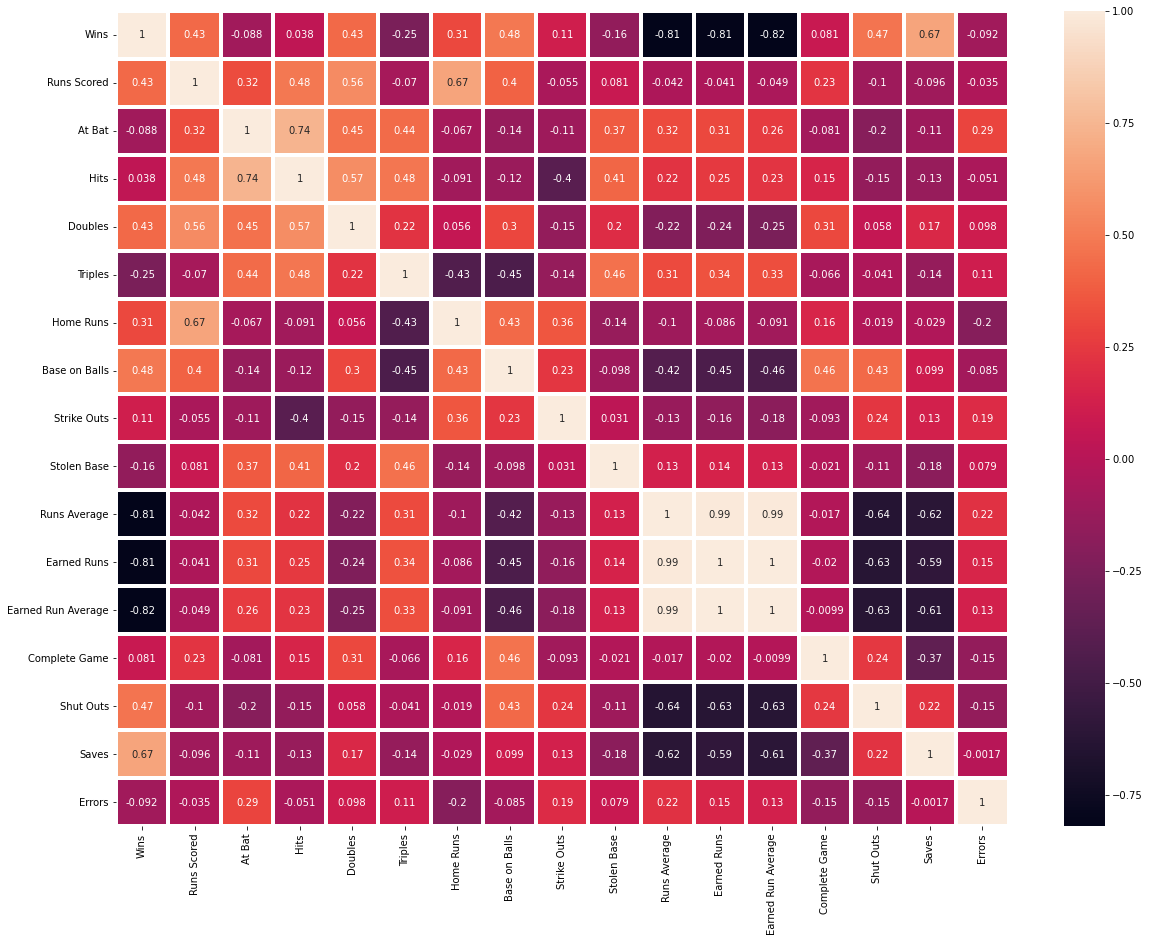

In [96]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,linecolor='white',linewidths=4)

In the above cell , we will remove Earned Runs and Earned Run Average because they are multicollinear to each other.

In [97]:
df = df.drop(['Earned Runs','Earned Run Average'],axis=1)

df.shape

(30, 15)

Now we will also use the vif method for checking multicollinearity in our data.

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['features'] = df.columns
vif

,vif,features
0,982.193392,Wins
1,2906.807882,Runs Scored
2,4645.120596,At Bat
3,4212.742062,Hits
4,961.266138,Doubles
5,30.223219,Triples
6,244.487337,Home Runs
7,257.756387,Base on Balls
8,354.725351,Strike Outs
9,27.673378,Stolen Base


Every column has a vif higher than 10

Since every column is highly correlated with each other , we will Feature Selection technique to select the best values for our model selection approach.

# Feature Selection

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label respectively.

In [99]:
X = df.drop(['Wins'],axis=1)
Y = df['Wins']

I have used SelectKBest for selecting k best features for our model.

In [100]:
from sklearn.feature_selection import SelectKBest,f_regression

In [101]:
best_features = SelectKBest(score_func=f_regression,k=12)

fit = best_features.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)

In [102]:
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores

,0,0
0,Runs Scored,6.378861
1,At Bat,0.218257
2,Hits,0.039668
3,Doubles,6.272152
4,Triples,1.884521
5,Home Runs,2.922118
6,Base on Balls,8.581552
7,Strike Outs,0.354728
8,Stolen Base,0.709779
9,Runs Average,54.569271


In [103]:
feature_scores.columns = ['Feature_Name','Score']

new_X = feature_scores.nlargest(12,'Score')

new_X

,Feature_Name,Score
9,Runs Average,54.569271
12,Saves,22.383430
6,Base on Balls,8.581552
11,Shut Outs,8.017499
0,Runs Scored,6.378861
3,Doubles,6.272152
5,Home Runs,2.922118
4,Triples,1.884521
8,Stolen Base,0.709779
7,Strike Outs,0.354728


In the above cell,there are best 12 out of 14 values which I will be going to use in training our model.

The next part is to create a new variable and store the values in the form of dataframe.

In [104]:
X_new = df[['Runs Average','Saves','Base on Balls','Shut Outs','Runs Scored','Doubles','Home Runs','Triples','Stolen Base','Strike Outs',
           'Errors','At Bat']]

In [105]:
X_new.head()

,Runs Average,Saves,Base on Balls,Shut Outs,Runs Scored,Doubles,Home Runs,Triples,Stolen Base,Strike Outs,Errors,At Bat
0,641,56,383,8,724,300,139,42,104,973,88.0,5575
1,700,45,439,12,696,277,156,44,70,1264,86.0,5467
2,640,38,533,10,669,303,141,29,86,1157,79.0,5439
3,701,37,404,9,622,260,136,27,68,1231,101.0,5533
4,803,35,455,12,689,289,151,49,83,1259,86.0,5605


In [106]:
X_new.skew()

Runs Average     0.045734
Saves            0.657524
Base on Balls    0.158498
Shut Outs        0.565790
Runs Scored      1.200786
Doubles         -0.230650
Home Runs        0.516441
Triples          0.129502
Stolen Base      0.479893
Strike Outs     -0.156065
Errors           0.702142
At Bat           0.183437
dtype: float64

I can see that there are still few columns showing slight skewness but overall it seems that they are either within the acceptable range or very near to the acceptable range of skewness that is +/-0.5.

Next part is to scale the values of X_new in scalable manner.

# Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler

StandardScaler()

In [108]:
X_scaled = pd.DataFrame(scaler.fit_transform(X_new),columns=X_new.columns)

X_scaled.head()

,Runs Average,Saves,Base on Balls,Shut Outs,Runs Scored,Doubles,Home Runs,Triples,Stolen Base,Strike Outs,Errors,At Bat
0,-0.666234,1.671607,-1.534902,-0.814629,0.619078,1.420173,-0.787299,1.041193,0.913883,-2.697630,-0.458455,0.847731
1,0.165971,0.249879,-0.536592,0.172800,0.134432,0.127403,-0.243967,1.235809,-0.601826,0.154878,-0.616000,-0.711094
2,-0.680339,-0.654856,1.139144,-0.320914,-0.332906,1.588795,-0.723377,-0.223808,0.111449,-0.893982,-1.167406,-1.115233
3,0.180076,-0.784104,-1.160536,-0.567771,-1.146419,-0.828122,-0.883181,-0.418423,-0.690985,-0.168602,0.565585,0.241522
4,1.618803,-1.042600,-0.251360,0.172800,0.013270,0.801892,-0.403770,1.722347,-0.022290,0.105866,-0.616000,1.280738


I will check for multicollinearity in my updated Dataframe.

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif['features'] = X_scaled.columns
vif

,vif,features
0,4.602312,Runs Average
1,2.200847,Saves
2,2.630370,Base on Balls
3,2.999614,Shut Outs
4,5.866007,Runs Scored
5,2.908148,Doubles
6,5.464231,Home Runs
7,2.957093,Triples
8,1.573741,Stolen Base
9,2.116147,Strike Outs


All the values are below the value 10 , so there is no multicollinearity present in the updated dataframe.

# Model Building

Now I will start bulding my machine learning model.

In [110]:
#import required libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

In [111]:
#DATA required
X_scaled.shape

(30, 12)

In [112]:
Y.shape

(30,)

# LINEAR REGRESSION

First we will start with Linear Regression to find the best random state for building our Linear Regression Model.

In [176]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    lr_r2 = r2_score(y_test, y_lr)
    
    if lr_r2>maxAccuracy:
        maxAccuracy=lr_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.9118919706509098  on Random State 90


In [177]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=90)

#training our model
lr=LinearRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
lr_r2 = r2_score(y_test, y_lr)

#R2 Score
print("R2 score : ", lr_r2)

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_lr))
print("Mean Square Error : ",mean_squared_error(y_test,y_lr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_lr)))

R2 score :  0.9118919706509098
[ 0.43627596 -1.05213595  0.56042331  0.60879105  0.86335685]
Cross Validation Score :  0.28334224372001227
Mean Absolute Error : 2.178745771195022
Mean Square Error :  8.673746000365995
Root Mean Square Error : 2.945122408384072


In [178]:
#K-fold cross validation
K_fold = KFold(5,random_state=90,shuffle=True)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("K-Fold Cross Validation Score : " , l1.mean())

KFold(n_splits=5, random_state=90, shuffle=True)
[0.87383707 0.32652429 0.58397798 0.6623998  0.49298607]
K-Fold Cross Validation Score :  0.5879450423732776


In [179]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=90)
print(shuffle)
l2 = cross_val_score(lr,X_scaled,Y,cv=shuffle)
print(l2)
print("Shuffle Split : ",l2.mean())

ShuffleSplit(n_splits=5, random_state=90, test_size=0.3, train_size=None)
[0.91189197 0.44217156 0.65069812 0.7447589  0.6093338 ]
Shuffle Split :  0.6717708711913288


# DECISION TREE

Finding best random state for the model

In [180]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    dt_r2 = r2_score(y_test, y_dt)
    
    if dt_r2>maxAccuracy:
        maxAccuracy=dt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.7860019175455417  on Random State 58


In [194]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=58)

#training our model
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
dt_r2 = r2_score(y_test, y_dt)

#R2 Score
print("R2 score : ", dt_r2)

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_dt))
print("Mean Square Error : ",mean_squared_error(y_test,y_dt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_dt)))

R2 score :  0.6488015340364335
[-0.43605684 -9.25954198 -0.65651181 -0.30737834  0.53491124]
Cross Validation Score :  -2.024915544294318
Mean Absolute Error : 5.888888888888889
Mean Square Error :  45.22222222222222
Root Mean Square Error : 6.724747000610671


In [205]:
K_fold = KFold(5,random_state=58,shuffle=True)
print(K_fold)
l11 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(l11)
print("K-Fold Cross Validation Score : " , l11.mean())

KFold(n_splits=5, random_state=58, shuffle=True)
[-0.7651715  -1.7615894  -0.59301791  0.36741214 -0.15868899]
K-Fold Cross Validation Score :  -0.5822111340727314


In [207]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=58)
print(shuffle)
l21 = cross_val_score(dt,X_scaled,Y,cv=shuffle)
print(l21)
print("Shuffle Split : ",l21.mean())

ShuffleSplit(n_splits=5, random_state=58, test_size=0.3, train_size=None)
[0.60393097 0.02252706 0.69050657 0.47068404 0.13660477]
Shuffle Split :  0.3848506822030867


# KNN

Finding best random state for the model

In [208]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    knn_r2 = r2_score(y_test, y_knn)
    
    if knn_r2>maxAccuracy:
        maxAccuracy=knn_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.760436137071651  on Random State 94


In [209]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=94)

#training our model
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
knn_r2 = r2_score(y_test, y_knn)

#R2 Score
print("R2 score : ", knn_r2)

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_knn))
print("Mean Square Error : ",mean_squared_error(y_test,y_knn))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_knn)))

R2 score :  0.760436137071651
[ 0.32486679 -1.1540458   0.11412034 -0.0922449   0.48968047]
Cross Validation Score :  -0.06352462118455157
Mean Absolute Error : 3.622222222222223
Mean Square Error :  17.08888888888889
Root Mean Square Error : 4.133870932780665


In [210]:
#K-Fold
K_fold = KFold(5,random_state=94,shuffle=True)
print(K_fold)
k = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k)
print("K-Fold Cross Validation Score : " , k.mean())

KFold(n_splits=5, random_state=94, shuffle=True)
[0.84454545 0.50244877 0.3783943  0.3545041  0.33507526]
K-Fold Cross Validation Score :  0.482993578039885


In [211]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=94)
print(shuffle)
k1 = cross_val_score(knn,X_scaled,Y,cv=shuffle)
print(k1)
print("Shuffle Split : ",k1.mean())

ShuffleSplit(n_splits=5, random_state=94, test_size=0.3, train_size=None)
[0.76043614 0.49210134 0.35996935 0.60817053 0.27567568]
Shuffle Split :  0.4992706055198345


# Support Vector Machine

Finding best random state for the model

In [212]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    svr=SVR()
    svr.fit(x_train, y_train)
    y_svr = svr.predict(x_test)
    svr_r2 = r2_score(y_test, y_svr)
    
    if svr_r2>maxAccuracy:
        maxAccuracy=svr_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.18020724590085901  on Random State 87


In [213]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=87)

#training our model
svr=SVR()
svr.fit(x_train, y_train)

#Predicting y_test
y_svr = svr.predict(x_test)
svr_r2 = r2_score(y_test, y_svr)

#R2 Score
print("R2 score : ", svr_r2)

#Cross Validation Score
cross_val_svr = cross_val_score(svr,X_scaled,Y,cv=5)
print(cross_val_svr)
print("Cross Validation Score : ",cross_val_svr.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_svr))
print("Mean Square Error : ",mean_squared_error(y_test,y_svr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_svr)))

R2 score :  0.18020724590085901
[-0.11899101 -0.83386123 -0.28226735 -0.64442553 -0.00859987]
Cross Validation Score :  -0.37762899976183395
Mean Absolute Error : 6.203260583549999
Mean Square Error :  50.36158943700402
Root Mean Square Error : 7.09658998653607


In [214]:
#K-Fold
K_fold = KFold(5,random_state=87,shuffle=True)
print(K_fold)
s = cross_val_score(svr,X_scaled,Y,cv=K_fold)
print(s)
print("K-Fold Cross Validation Score : " , s.mean())

KFold(n_splits=5, random_state=87, shuffle=True)
[ 0.28501228  0.0878943  -0.35771863 -0.02102712  0.05591611]
K-Fold Cross Validation Score :  0.010015388880710097


In [215]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=87)
print(shuffle)
s1 = cross_val_score(svr,X_scaled,Y,cv=shuffle)
print(s1)
print("Shuffle Split : ",s1.mean())

ShuffleSplit(n_splits=5, random_state=87, test_size=0.3, train_size=None)
[0.18020725 0.0256544  0.03841929 0.10416164 0.10926942]
Shuffle Split :  0.09154240013447519


# Random Forest

Finding best random state for the model

In [216]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    rf_r2 = r2_score(y_test, y_rf)
    
    if rf_r2>maxAccuracy:
        maxAccuracy=rf_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.7466584483710659  on Random State 73


In [217]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=62)

#training our model
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
rf_r2 = r2_score(y_test, y_rf)

#R2 Score
print("R2 score : ", rf_r2)

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_rf))
print("Mean Square Error : ",mean_squared_error(y_test,y_rf))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_rf)))

R2 score :  0.634869947659203
[ 0.09859671 -4.65340954  0.20655529  0.31049356  0.6699897 ]
Cross Validation Score :  -0.6735548534019679
Mean Absolute Error : 4.003333333333335
Mean Square Error :  31.004500000000014
Root Mean Square Error : 5.568168460095295


In [218]:
#K-Fold
K_fold = KFold(5,random_state=62,shuffle=True)
print(K_fold)
r = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r)
print("K-Fold Cross Validation Score : " , r.mean())

KFold(n_splits=5, random_state=62, shuffle=True)
[0.35751091 0.20193082 0.65231803 0.17269811 0.71437928]
K-Fold Cross Validation Score :  0.41976742956981267


In [219]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=62)
print(shuffle)
r1 = cross_val_score(rf,X_scaled,Y,cv=shuffle)
print(r1)
print("Shuffle Split : ",r1.mean())

ShuffleSplit(n_splits=5, random_state=62, test_size=0.3, train_size=None)
[0.66682976 0.68787229 0.59367316 0.45405519 0.51046026]
Shuffle Split :  0.5825781332935314


# ADA BOOST

Finding best random state for the model

In [232]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    y_ad = ad.predict(x_test)
    ad_r2 = r2_score(y_test, y_ad)
    
    if ad_r2>maxAccuracy:
        maxAccuracy=ad_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.7682159120478793  on Random State 97


In [233]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=97)

#training our model
ad=AdaBoostRegressor()
ad.fit(x_train, y_train)

#Predicting y_test
y_ad = ad.predict(x_test)
ad_r2 = r2_score(y_test, y_ad)

#R2 Score
print("R2 score : ", ad_r2)

#Cross Validation Score
cross_score_ad = cross_val_score(ad,X_scaled,Y,cv=5)
print(cross_score_ad)
print("Cross Validation Score : ",cross_score_ad.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_ad))
print("Mean Square Error : ",mean_squared_error(y_test,y_ad))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_ad)))

R2 score :  0.7437666682598099
[ 0.31458868 -5.19084212  0.2413049   0.17891156  0.65680373]
Cross Validation Score :  -0.7598466504735241
Mean Absolute Error : 4.06031746031746
Mean Square Error :  24.313696145124716
Root Mean Square Error : 4.930892023267668


In [222]:
K_fold = KFold(5,random_state=62,shuffle=True)
print(K_fold)
a = cross_val_score(ad,X_scaled,Y,cv=K_fold)
print(a)
print("K-Fold Cross Validation Score : " , a.mean())

KFold(n_splits=5, random_state=62, shuffle=True)
[ 0.21597043  0.11448724  0.76789477 -0.26205214  0.75355266]
K-Fold Cross Validation Score :  0.31797059428221575


In [223]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=62)
print(shuffle)
a1 = cross_val_score(ad,X_scaled,Y,cv=shuffle)
print(a1)
print("Shuffle Split : ",a1.mean())

ShuffleSplit(n_splits=5, random_state=62, test_size=0.3, train_size=None)
[0.62534368 0.69633707 0.60309444 0.248307   0.49045932]
Shuffle Split :  0.5327083019138467


# GRADIENT BOOST

In [224]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    gb=GradientBoostingRegressor()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    gb_r2 = r2_score(y_test, y_gb)
    
    if gb_r2>maxAccuracy:
        maxAccuracy=gb_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.640819880743863  on Random State 97


In [225]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=35)

#training our model
gb=GradientBoostingRegressor()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
gb_r2 = r2_score(y_test, y_gb)

#R2 Score
print("R2 score : ", gb_r2)

#Cross Validation Score
cross_score_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_score_gb)
print("Cross Validation Score : ",cross_score_gb.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_gb))
print("Mean Square Error : ",mean_squared_error(y_test,y_gb))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_gb)))

R2 score :  0.7217570777778188
[ 0.09145587 -7.53117467  0.30128512  0.33040677  0.63702517]
Cross Validation Score :  -1.2342003484829038
Mean Absolute Error : 5.066205630607911
Mean Square Error :  38.76851382962391
Root Mean Square Error : 6.226436687996106


In [226]:
K_fold = KFold(5,random_state=35,shuffle=True)
print(K_fold)
g = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g)
print("K-Fold Cross Validation Score : " , g.mean())

KFold(n_splits=5, random_state=35, shuffle=True)
[0.55062709 0.30548834 0.1493948  0.44422218 0.59293203]
K-Fold Cross Validation Score :  0.4085328889945334


In [227]:
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=35)
print(shuffle)
g1 = cross_val_score(gb,X_scaled,Y,cv=shuffle)
print(g1)
print("Shuffle Split : ",g1.mean())

ShuffleSplit(n_splits=5, random_state=35, test_size=0.3, train_size=None)
[ 0.64184633  0.53148502  0.20301101  0.41770957 -0.71420259]
Shuffle Split :  0.21596986632363233


---------------------------------------------------------------------------------------------------------------------------

# XGBOOST

In [228]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    xgbt=xgb.XGBRegressor()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    xgbt_r2 = r2_score(y_test, y_xgbt)
    
    if xgbt_r2>maxAccuracy:
        maxAccuracy=xgbt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.7758788374524144  on Random State 19


In [229]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=19)

#training our model
xgbt=xgb.XGBRegressor()
xgbt.fit(x_train, y_train)

#Predicting y_test
y_xgbt = xgbt.predict(x_test)
xgbt_r2 = r2_score(y_test, y_xgbt)

#R2 Score
print("R2 score : ", xgbt_r2)

#Cross Validation Score
cross_score_xgbt = cross_val_score(xgbt,X_scaled,Y,cv=5)
print(cross_score_xgbt)
print("Cross Validation Score : ",cross_score_xgbt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_xgbt))
print("Mean Square Error : ",mean_squared_error(y_test,y_xgbt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_xgbt)))

R2 score :  0.7758788374524144
[-1.02660636 -5.27782594  0.20698443  0.44572465  0.75399481]
Cross Validation Score :  -0.9795456808889951
Mean Absolute Error : 3.514029608832465
Mean Square Error :  19.728196160052903
Root Mean Square Error : 4.441643407574825


In [230]:
#K-Fold
K_fold = KFold(5,random_state=19,shuffle=True)
print(K_fold)
xg = cross_val_score(xgbt,X_scaled,Y,cv=K_fold)
print(xg)
print("K-Fold Cross Validation Score : " , xg.mean())

KFold(n_splits=5, random_state=19, shuffle=True)
[ 0.67715261  0.69195719  0.34332696 -3.63035356 -0.75623656]
K-Fold Cross Validation Score :  -0.5348306728681526


In [231]:
#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30,random_state=19)
print(shuffle)
xg1 = cross_val_score(xgbt,X_scaled,Y,cv=shuffle)
print(xg1)
print("Shuffle Split : ",xg1.mean())

ShuffleSplit(n_splits=5, random_state=19, test_size=0.3, train_size=None)
[0.77587884 0.42494704 0.33974198 0.20794964 0.41285886]
Shuffle Split :  0.4322752724884748


# R2_SCORES

In [239]:
print("R2 Scores : ")
print("---------------------------------------------")
print("Linear Regression :        ",lr_r2*100)
print("Decision Tree :            ",dt_r2*100)
print("KNN :                      ",knn_r2*100)
print("Support Vector Machine :   ",svr_r2*100)
print("Random Forest :            ",rf_r2*100)
print("Ada Boost :                ",ad_r2*100)
print("Gradient Boost :           ",gb_r2*100)
print("XGBoost :                  ", xgbt_r2*100)

R2 Scores : 
---------------------------------------------
Linear Regression :         91.18919706509098
Decision Tree :             64.88015340364335
KNN :                       76.04361370716511
Support Vector Machine :    18.0207245900859
Random Forest :             63.4869947659203
Ada Boost :                 74.37666682598099
Gradient Boost :            72.17570777778188
XGBoost :                   77.58788374524144


I have computed the models and from the model I see that the r2 score for linear regression is at 91%.

___________________________________________________________________________________________________________________________

Using the Linear Regression Model I will hypertune the parameters for a better r2 score.

# HyperParameter Tuning

In [241]:
from sklearn.model_selection import GridSearchCV

In [242]:
#Choosing Linear Regression

params = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

After comparing all the regression models I have selected Linear Regression as my best model and have listed down it's parameters above referring the sklearn webpage

In [243]:
gradient_search_lr = GridSearchCV(LinearRegression(),param_grid=params,cv=5)

gradient_search_lr

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [244]:
gradient_search_lr.estimator

LinearRegression()

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [245]:
gradient_search_lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [246]:
gradient_search_lr.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': False,
 'positive': True}

In [247]:
gradient_search_lr.best_estimator_

LinearRegression(n_jobs=-2, normalize=False, positive=True)

In [248]:
gradient_search_lr.best_score_

0.6304604504870521

Based on best params , I have incorporated the params in my final model.

In [252]:
final_model = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=-2, normalize=False, positive=True)
print(final_model)
print("------------------------------------------------------------------------")
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(final_model_pred)
print("R2 Score :",r2_score(y_test,final_model_pred))
print("------------------------------------------------------------------------")
print("Mean Absolute Error :",mean_absolute_error(y_test,final_model_pred))
print("Mean Square Error : ",mean_squared_error(y_test,final_model_pred))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,final_model_pred)))
print("------------------------------------------------------------------------")

LinearRegression(n_jobs=-2, normalize=False, positive=True)
------------------------------------------------------------------------
[82.48989439 73.58681136 66.16822766 91.94353214 62.88494062 85.72414133
 83.09839774 88.38830352 84.98422561]
R2 Score : 0.8040254194070442
------------------------------------------------------------------------
Mean Absolute Error : 3.4329747026742785
Mean Square Error :  18.595810202931588
Root Mean Square Error : 4.312285960245632
------------------------------------------------------------------------


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

# Save the best model

In [250]:
import pickle

In [251]:
filename = 'Baseball.pkl'
pickle.dump(final_model,open(filename,'wb'))

Finally, I am saving my best regression model using the pickle library.

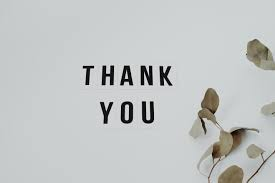